In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Explore Data

In [ ]:
Car_Prices_Data=pd.read_csv("/content/drive/MyDrive/DEPI/Machine Learning/regression/car_price_prediction.csv")

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
Car_Prices_Data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:
Car_Prices_Data.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [ ]:
Car_Prices_Data.isnull().sum()

,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


In [ ]:
Car_Prices_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

# Change Data Types and Clean columns Values

In [ ]:
Car_Prices_Data.columns=Car_Prices_Data.columns.str.lower()

In [ ]:
Car_Prices_Data.columns

Index(['id', 'price', 'levy', 'manufacturer', 'model', 'prod. year',
       'category', 'leather interior', 'fuel type', 'engine volume', 'mileage',
       'cylinders', 'gear box type', 'drive wheels', 'doors', 'wheel', 'color',
       'airbags'],
      dtype='object')

In [ ]:
for col in Car_Prices_Data.select_dtypes('object'):
  Car_Prices_Data[col]=Car_Prices_Data[col].str.lower().str.strip()

In [ ]:
Car_Prices_Data.head()

,id,price,levy,manufacturer,model,prod. year,category,leather interior,fuel type,engine volume,mileage,cylinders,gear box type,drive wheels,doors,wheel,color,airbags
0,45654403,13328,1399,lexus,rx 450,2010,jeep,yes,hybrid,3.5,186005 km,6.0,automatic,4x4,04-may,left wheel,silver,12
1,44731507,16621,1018,chevrolet,equinox,2011,jeep,no,petrol,3,192000 km,6.0,tiptronic,4x4,04-may,left wheel,black,8
2,45774419,8467,-,honda,fit,2006,hatchback,no,petrol,1.3,200000 km,4.0,variator,front,04-may,right-hand drive,black,2
3,45769185,3607,862,ford,escape,2011,jeep,yes,hybrid,2.5,168966 km,4.0,automatic,4x4,04-may,left wheel,white,0
4,45809263,11726,446,honda,fit,2014,hatchback,yes,petrol,1.3,91901 km,4.0,automatic,front,04-may,left wheel,silver,4


## id Column

In [ ]:
x=Car_Prices_Data['id'].min()
y=Car_Prices_Data['id'].max()
print(x)
print(y)

20746880
45816654


In [ ]:
# id column not inmportant in data
id_column=Car_Prices_Data['id']
Car_Prices_Data.pop('id')

,id
0,45654403
1,44731507
2,45774419
3,45769185
4,45809263
...,...
19232,45798355
19233,45778856
19234,45804997
19235,45793526


In [ ]:
Car_Prices_Data.head()

,price,levy,manufacturer,model,prod. year,category,leather interior,fuel type,engine volume,mileage,cylinders,gear box type,drive wheels,doors,wheel,color,airbags
0,13328,1399,lexus,rx 450,2010,jeep,yes,hybrid,3.5,186005 km,6.0,automatic,4x4,04-may,left wheel,silver,12
1,16621,1018,chevrolet,equinox,2011,jeep,no,petrol,3,192000 km,6.0,tiptronic,4x4,04-may,left wheel,black,8
2,8467,-,honda,fit,2006,hatchback,no,petrol,1.3,200000 km,4.0,variator,front,04-may,right-hand drive,black,2
3,3607,862,ford,escape,2011,jeep,yes,hybrid,2.5,168966 km,4.0,automatic,4x4,04-may,left wheel,white,0
4,11726,446,honda,fit,2014,hatchback,yes,petrol,1.3,91901 km,4.0,automatic,front,04-may,left wheel,silver,4


##[manufacturer,category,model,fuel type,gear box type,wheel,leather interior,drive wheels] Columns

In [ ]:
# Car_Prices_Data['manufacturer'].unique()
# Car_Prices_Data['category'].unique()
# Car_Prices_Data['model'].unique()
# Car_Prices_Data['fuel type'].unique()
# Car_Prices_Data['gear box type'].unique()
# Car_Prices_Data['wheel'].unique()
# Car_Prices_Data['leather interior'].unique()
Car_Prices_Data['drive wheels'].unique()

array(['4x4', 'front', 'rear'], dtype=object)

In [ ]:
Car_Prices_Data[
    ['manufacturer','category','model','fuel type','gear box type','wheel','leather interior','drive wheels']
    ]=Car_Prices_Data[
    ['manufacturer','category','model','fuel type','gear box type','wheel','leather interior','drive wheels']
    ].astype('category')

In [ ]:
Car_Prices_Data['drive wheels']=Car_Prices_Data['drive wheels'].replace({
    'Front':'front',
    'Rear':'rear'
})

In [ ]:
Car_Prices_Data['drive wheels'].unique()

['4x4', 'front', 'rear']
Categories (3, object): ['4x4', 'front', 'rear']

### see result's

In [ ]:
Car_Prices_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             19237 non-null  int64   
 1   levy              19237 non-null  object  
 2   manufacturer      19237 non-null  category
 3   model             19237 non-null  category
 4   prod. year        19237 non-null  int64   
 5   category          19237 non-null  category
 6   leather interior  19237 non-null  category
 7   fuel type         19237 non-null  category
 8   engine volume     19237 non-null  object  
 9   mileage           19237 non-null  object  
 10  cylinders         19237 non-null  float64 
 11  gear box type     19237 non-null  category
 12  drive wheels      19237 non-null  category
 13  doors             19237 non-null  object  
 14  wheel             19237 non-null  category
 15  color             19237 non-null  object  
 16  airbags           1923

## Production Year & mileage in km Columns

In [ ]:
Car_Prices_Data.rename(columns={
    'prod. year':'production year',
    'mileage':'mileage in km'
},inplace=True)

In [ ]:
Car_Prices_Data['no of years']=2025-Car_Prices_Data['production year']

In [ ]:
Car_Prices_Data.head()

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,doors,wheel,color,airbags,no of years
0,13328,1399,lexus,rx 450,2010,jeep,yes,hybrid,3.5,186005 km,6.0,automatic,4x4,04-may,left wheel,silver,12,15
1,16621,1018,chevrolet,equinox,2011,jeep,no,petrol,3,192000 km,6.0,tiptronic,4x4,04-may,left wheel,black,8,14
2,8467,-,honda,fit,2006,hatchback,no,petrol,1.3,200000 km,4.0,variator,front,04-may,right-hand drive,black,2,19
3,3607,862,ford,escape,2011,jeep,yes,hybrid,2.5,168966 km,4.0,automatic,4x4,04-may,left wheel,white,0,14
4,11726,446,honda,fit,2014,hatchback,yes,petrol,1.3,91901 km,4.0,automatic,front,04-may,left wheel,silver,4,11


In [ ]:
Car_Prices_Data['production year']=pd.Categorical(Car_Prices_Data['production year'],ordered=True)

In [ ]:
Car_Prices_Data['mileage in km'].unique()

array(['186005 km', '192000 km', '200000 km', ..., '140607 km',
       '307325 km', '186923 km'], dtype=object)

In [ ]:
Car_Prices_Data['mileage in km']=Car_Prices_Data['mileage in km'].apply(lambda x:x[0:-3] if x[-1]=='m' else x)

In [ ]:
Car_Prices_Data['mileage in km'].unique()

array(['186005', '192000', '200000', ..., '140607', '307325', '186923'],
      dtype=object)

In [ ]:
#To Sure Milage Has Float Values OR Not

float_or_not = Car_Prices_Data['mileage in km'].apply(lambda x:x.isnumeric())
float_or_not[float_or_not==False]

#NO Float Values

,mileage in km


In [ ]:
Car_Prices_Data['mileage in km']=Car_Prices_Data['mileage in km'].astype(int)

### see result's

In [ ]:
Car_Prices_Data.head()

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,doors,wheel,color,airbags,no of years
0,13328,1399,lexus,rx 450,2010,jeep,yes,hybrid,3.5,186005,6.0,automatic,4x4,04-may,left wheel,silver,12,15
1,16621,1018,chevrolet,equinox,2011,jeep,no,petrol,3,192000,6.0,tiptronic,4x4,04-may,left wheel,black,8,14
2,8467,-,honda,fit,2006,hatchback,no,petrol,1.3,200000,4.0,variator,front,04-may,right-hand drive,black,2,19
3,3607,862,ford,escape,2011,jeep,yes,hybrid,2.5,168966,4.0,automatic,4x4,04-may,left wheel,white,0,14
4,11726,446,honda,fit,2014,hatchback,yes,petrol,1.3,91901,4.0,automatic,front,04-may,left wheel,silver,4,11


In [ ]:
Car_Prices_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             19237 non-null  int64   
 1   levy              19237 non-null  object  
 2   manufacturer      19237 non-null  category
 3   model             19237 non-null  category
 4   production year   19237 non-null  category
 5   category          19237 non-null  category
 6   leather interior  19237 non-null  category
 7   fuel type         19237 non-null  category
 8   engine volume     19237 non-null  object  
 9   mileage in km     19237 non-null  int64   
 10  cylinders         19237 non-null  float64 
 11  gear box type     19237 non-null  category
 12  drive wheels      19237 non-null  category
 13  doors             19237 non-null  object  
 14  wheel             19237 non-null  category
 15  color             19237 non-null  object  
 16  airbags           1923

## engine volume Column

In [ ]:
Car_Prices_Data['engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 turbo', '2.2 turbo', '4.7', '1.5', '4.4', '3.0 turbo',
       '1.4 turbo', '3.6', '2.3', '1.5 turbo', '1.6 turbo', '2.2',
       '2.3 turbo', '1.4', '5.5', '2.8 turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 turbo', '2.4 turbo', '3.5 turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 turbo', '3.7', '1', '2.5 turbo', '2.6',
       '1.9 turbo', '4.4 turbo', '4.7 turbo', '0.8', '0.2 turbo', '5.7',
       '4.8 turbo', '4.6 turbo', '6.7', '6.2', '1.2 turbo', '3.4',
       '1.7 turbo', '6.3 turbo', '2.7 turbo', '4.3', '4.2', '2.9 turbo',
       '0', '4.0 turbo', '20', '3.6 turbo', '0.3', '3.7 turbo', '5.9',
       '5.5 turbo', '0.2', '2.1 turbo', '5.6', '6', '0.7 turbo',
       '0.6 turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 turbo', '6.3',
       '4.5 turbo', '0.8 turbo', '4.2 turbo', '3.1', '5.0 turbo', '6.4',
       '3

In [ ]:
Car_Prices_Data[Car_Prices_Data['engine volume']=='0']

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,doors,wheel,color,airbags,no of years
2010,53941,87,tesla,model x,2018,sedan,yes,petrol,0,81907,6.0,automatic,4x4,04-may,left wheel,silver,12,7
3105,2430,87,mercedes-benz,c 250,2013,coupe,yes,petrol,0,121600,4.0,automatic,rear,04-may,left wheel,white,12,12
3516,27356,87,hyundai,elantra,2016,sedan,yes,lpg,0,65004,4.0,automatic,front,04-may,left wheel,white,4,9
4814,17663,87,toyota,aqua,2012,hatchback,yes,petrol,0,118000,4.0,automatic,front,04-may,left wheel,grey,4,13
7022,17663,87,toyota,aqua,2012,hatchback,yes,petrol,0,118000,4.0,automatic,front,04-may,left wheel,grey,4,13
7685,47076,87,ssangyong,rexton,2016,jeep,yes,diesel,0,73968,4.0,automatic,front,04-may,left wheel,black,4,9
10603,12231,87,toyota,prius,2010,hatchback,no,hybrid,0,0,4.0,automatic,front,04-may,left wheel,golden,0,15
12917,6,87,mercedes-benz,e 350,2016,sedan,yes,petrol,0,33600,6.0,automatic,rear,04-may,left wheel,white,12,9
14642,3,87,porsche,panamera,2011,sedan,yes,petrol,0,196800,6.0,automatic,rear,04-may,left wheel,black,12,14
17375,78,87,mercedes-benz,cls 550,2014,sedan,yes,petrol,0,92800,8.0,automatic,rear,04-may,left wheel,black,12,11


In [ ]:
Car_Prices_Data[Car_Prices_Data['engine volume']=='0'].shape

(10, 18)

In [ ]:
Car_Prices_Data.shape

(19237, 18)

-- Delete values with engine volumn =0 cause it is important column in pricing car and it is not logical to has a car with engine volumn equal zero

In [ ]:
Car_Prices_Data=Car_Prices_Data[Car_Prices_Data['engine volume']!='0']
Car_Prices_Data.shape

(19227, 18)

In [ ]:
def is_float(value):
  try:
    float(value)
    return "no"
  except ValueError:
    return "yes"
# print(is_float(3))
Car_Prices_Data['engine with turbo']=Car_Prices_Data['engine volume'].apply(is_float)
Car_Prices_Data['engine with turbo']=Car_Prices_Data['engine with turbo'].astype('category')

In [ ]:
def delete_Turbo(value):
  if 'turbo' in value:
    return value[0:-5]
  else:
    return value

Car_Prices_Data['engine volume']=Car_Prices_Data['engine volume'].apply(delete_Turbo)

In [ ]:
Car_Prices_Data['engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 ', '2.2 ', '4.7', '1.5', '4.4', '3.0 ', '1.4 ', '3.6', '2.3',
       '1.5 ', '1.6 ', '2.2', '2.3 ', '1.4', '5.5', '2.8 ', '3.2', '3.8',
       '4.6', '1.2', '5', '1.7', '2.9', '0.5', '1.8 ', '2.4 ', '3.5 ',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 ', '1.1', '2.1',
       '0.7', '5.4', '1.3 ', '3.7', '1', '2.5 ', '2.6', '1.9 ', '4.4 ',
       '4.7 ', '0.8', '0.2 ', '5.7', '4.8 ', '4.6 ', '6.7', '6.2', '1.2 ',
       '3.4', '1.7 ', '6.3 ', '2.7 ', '4.3', '4.2', '2.9 ', '4.0 ', '20',
       '3.6 ', '0.3', '3.7 ', '5.9', '5.5 ', '0.2', '2.1 ', '5.6', '6',
       '0.7 ', '0.6 ', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 ', '6.3',
       '4.5 ', '0.8 ', '4.2 ', '3.1', '5.0 ', '6.4', '3.9', '5.7 ', '0.9',
       '0.4 ', '5.4 ', '0.3 ', '5.2', '5.8', '1.1 '], dtype=object)

In [ ]:
Car_Prices_Data['engine volume']=Car_Prices_Data['engine volume'].astype(float)

### see result's

In [ ]:
Car_Prices_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19227 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   price              19227 non-null  int64   
 1   levy               19227 non-null  object  
 2   manufacturer       19227 non-null  category
 3   model              19227 non-null  category
 4   production year    19227 non-null  category
 5   category           19227 non-null  category
 6   leather interior   19227 non-null  category
 7   fuel type          19227 non-null  category
 8   engine volume      19227 non-null  float64 
 9   mileage in km      19227 non-null  int64   
 10  cylinders          19227 non-null  float64 
 11  gear box type      19227 non-null  category
 12  drive wheels       19227 non-null  category
 13  doors              19227 non-null  object  
 14  wheel              19227 non-null  category
 15  color              19227 non-null  object  
 16  airbags  

## Doors Column

In [ ]:
Car_Prices_Data['doors'].unique()

array(['04-may', '02-mar', '>5'], dtype=object)

- I want to get name of models which have >5 to check the right numbers of doors

In [ ]:
df=Car_Prices_Data[Car_Prices_Data['doors']=='>5']
df.shape

(128, 19)

In [ ]:
df.head()

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,doors,wheel,color,airbags,no of years,engine with turbo
171,1300,-,audi,50,2018,coupe,yes,petrol,0.5,4000,1.0,tiptronic,rear,>5,right-hand drive,blue,0,7,no
276,20385,738,chevrolet,cruze,2017,sedan,no,petrol,1.4,42000,4.0,tiptronic,front,>5,left wheel,black,12,8,yes
678,7213,-,bmw,525,1998,sedan,no,petrol,2.5,100000,6.0,manual,rear,>5,left wheel,silver,6,27,no
829,30000,-,nissan,x-trail,2018,pickup,yes,petrol,2.5,18794,12.0,automatic,4x4,>5,left wheel,black,12,7,no
870,19757,810,hyundai,elantra,2016,sedan,no,petrol,1.8,113600,4.0,tiptronic,front,>5,left wheel,grey,6,9,no


In [ ]:
df['model'].value_counts()

,count
model,
transit,9
sprinter,6
prius,5
quest,5
land cruiser prado,4
...,...
cruze ls,0
cruze l t,0
cruze cruze,0


In [ ]:
print(df['model'].unique().shape)
print(Car_Prices_Data['model'].unique().shape)
print(df['model'].value_counts().shape)
print(Car_Prices_Data['model'].value_counts().shape)

(83,)
(1510,)
(1511,)
(1511,)


In [ ]:
x=df['model'].value_counts()
x[x.values>0].index

CategoricalIndex(['transit', 'sprinter', 'prius', 'quest',
                  'land cruiser prado', 'prius c', 'ml 350', 'camry', 'x5',
                  'elantra', 'rav 4', 'fit', 'x-trail', 'voxy', 'h1',
                  'land cruiser', 'vito', 'escape', 'cruze', 'viano',
                  'pathfinder', 'caliber', 'g 55 amg', 'grand cherokee laredo',
                  'juke', 'caddy', 'grand cherokee', '530', 'sintra', 'chr',
                  'insight', 'astra', '528', 'focus', 'fortuner', 'envoy',
                  'isis', 'transit 135', 'delica', 'is 250', '550', 'elysion',
                  '550 gt', 'astra g', 'escape titanium', 'santa fe', 'combo',
                  'transit connect', 'e 280 3.0', 'nx 300', '50', 'qx56',
                  'transit პერეგაროტკა', 'e 350', 'allroad', 'jetta',
                  'qashqai advance cvt', 'i20', 'c 200', 'fiesta', 'vaneo',
                  'zafira', 'a4', 'murano', '525', '520 d xdrive luxury',
                  'vectra', 'mpv', 's 550

- transit პერეგაროტკა this value mean transit van with partition so i will replace it

In [ ]:
Car_Prices_Data['model']=Car_Prices_Data['model'].replace(
    {
        'transit პერეგაროტკა': 'transit van with partition'
    }
)

/tmp/ipython-input-2235883092.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  Car_Prices_Data['model']=Car_Prices_Data['model'].replace(


In [ ]:
Car_Prices_Data[Car_Prices_Data['model']=='transit პერეგაროტკა']['model']

,model


In [ ]:
Car_Prices_Data[Car_Prices_Data['model']=='transit van with partition']['model']

,model
9647,transit van with partition


-- according to some search I found there are cars like vans have more than 4 doors and the number of doors may be depend on car version so I considers some models of cars have from 5 to 6 doors and fixed data entry error in doors column

In [ ]:
def doors_fix(value):
  # print(door)
  if value['doors']=='04-May':
    return pd.Series([4,1])
  elif value['doors']=='02-Mar':
    return pd.Series([2,1])
  else:
    if value['model'] in [
        'transit connect','transit პერეგაროტკა','transit 135','transit','sprinter','sprinter vip class','vito','vito 113'
        ]:
        return pd.Series([5,1])
    else:
      return pd.Series([4,1])
Car_Prices_Data[['front and beside doors','back doors']]=Car_Prices_Data[['doors','model']].apply(doors_fix,axis=1)

In [ ]:
Car_Prices_Data.head()

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,doors,wheel,color,airbags,no of years,engine with turbo,front and beside doors,back doors
0,13328,1399,lexus,rx 450,2010,jeep,yes,hybrid,3.5,186005,6.0,automatic,4x4,04-may,left wheel,silver,12,15,no,4,1
1,16621,1018,chevrolet,equinox,2011,jeep,no,petrol,3.0,192000,6.0,tiptronic,4x4,04-may,left wheel,black,8,14,no,4,1
2,8467,-,honda,fit,2006,hatchback,no,petrol,1.3,200000,4.0,variator,front,04-may,right-hand drive,black,2,19,no,4,1
3,3607,862,ford,escape,2011,jeep,yes,hybrid,2.5,168966,4.0,automatic,4x4,04-may,left wheel,white,0,14,no,4,1
4,11726,446,honda,fit,2014,hatchback,yes,petrol,1.3,91901,4.0,automatic,front,04-may,left wheel,silver,4,11,no,4,1


In [ ]:
Car_Prices_Data['front and beside doors'].value_counts()

,count
front and beside doors,
4,18840
5,387


In [ ]:
Car_Prices_Data['back doors'].value_counts()

,count
back doors,
1,19227


In [ ]:
doors_column=Car_Prices_Data.drop(columns=['doors'],inplace=True)

### see result's

In [ ]:
Car_Prices_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19227 entries, 0 to 19236
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   price                   19227 non-null  int64   
 1   levy                    19227 non-null  object  
 2   manufacturer            19227 non-null  category
 3   model                   19227 non-null  category
 4   production year         19227 non-null  category
 5   category                19227 non-null  category
 6   leather interior        19227 non-null  category
 7   fuel type               19227 non-null  category
 8   engine volume           19227 non-null  float64 
 9   mileage in km           19227 non-null  int64   
 10  cylinders               19227 non-null  float64 
 11  gear box type           19227 non-null  category
 12  drive wheels            19227 non-null  category
 13  wheel                   19227 non-null  category
 14  color                   192

# Duplicates

- Drop Duplicates

In [ ]:
duplicates=Car_Prices_Data.duplicated(keep=False)
Car_Prices_Data[duplicates].sort_values(by=['price'])

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,wheel,color,airbags,no of years,engine with turbo,front and beside doors,back doors
9892,30,-,honda,fit,2006,hatchback,no,petrol,1.3,0,4.0,automatic,front,right-hand drive,silver,4,19,no,4,1
13400,30,-,honda,fit,2006,hatchback,no,petrol,1.3,0,4.0,automatic,front,right-hand drive,silver,4,19,no,4,1
4366,30,-,honda,fit,2005,hatchback,no,petrol,1.3,0,4.0,automatic,front,right-hand drive,silver,4,20,no,4,1
2285,30,-,honda,fit,2003,hatchback,no,petrol,1.3,0,4.0,automatic,front,right-hand drive,red,4,22,no,4,1
16112,30,-,honda,fit,2007,hatchback,no,petrol,1.3,0,4.0,automatic,front,right-hand drive,silver,4,18,no,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17463,96263,866,ford,mustang,2015,sedan,yes,petrol,2.3,43770,4.0,automatic,front,left wheel,white,4,10,no,4,1
18941,96263,866,ford,mustang,2015,sedan,yes,petrol,2.3,43770,4.0,automatic,front,left wheel,white,4,10,no,4,1
14473,131716,1017,mercedes-benz,glc 300 glc coupe,2017,jeep,yes,petrol,2.0,28226,8.0,tiptronic,4x4,left wheel,white,12,8,yes,4,1
9120,131716,1017,mercedes-benz,glc 300 glc coupe,2017,jeep,yes,petrol,2.0,28226,8.0,tiptronic,4x4,left wheel,white,12,8,yes,4,1


In [ ]:
Car_Prices_Data=Car_Prices_Data.drop_duplicates()

In [ ]:
Car_Prices_Data.shape

(15716, 20)

# outlier analysis

In [ ]:
Car_Prices_Data.describe()

,price,engine volume,mileage in km,cylinders,airbags,no of years,front and beside doors,back doors
count,1.571600e+04,15716.000000,1.571600e+04,15716.000000,15716.000000,15716.000000,15716.000000,15716.0
mean,2.028082e+04,2.214088,1.837422e+06,4.483202,6.542504,14.483075,4.023861,1.0
std,2.106988e+05,0.804676,5.354779e+07,1.134218,4.067241,6.012959,0.152621,0.0
min,1.000000e+00,0.100000,0.000000e+00,1.000000,0.000000,5.000000,4.000000,1.0
25%,7.527000e+03,1.700000,6.659150e+04,4.000000,4.000000,11.000000,4.000000,1.0
50%,1.419750e+04,2.000000,1.210000e+05,4.000000,6.000000,13.000000,4.000000,1.0
75%,2.336400e+04,2.500000,1.800000e+05,4.000000,12.000000,17.000000,4.000000,1.0
max,2.630750e+07,20.000000,2.147484e+09,16.000000,16.000000,86.000000,5.000000,1.0


##Price Column

- Price column not in logical form

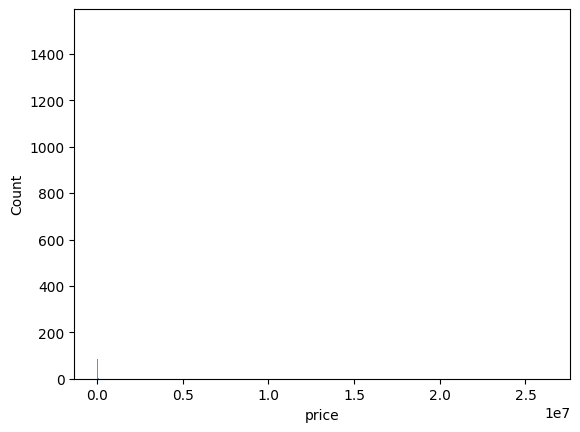

In [ ]:
plt.figure()
sns.histplot(data=Car_Prices_Data,x='price')
plt.show()

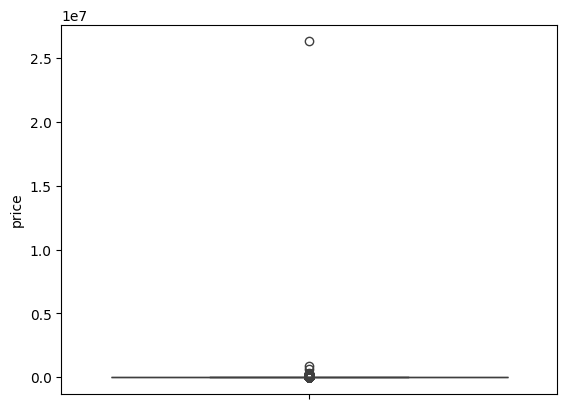

In [ ]:
plt.figure()
sns.boxplot(Car_Prices_Data['price'])
plt.show()

- this is a high outlier point let's delete it and not logical to other values of column price

In [ ]:
Car_Prices_Data[Car_Prices_Data['price']>1000000]

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,wheel,color,airbags,no of years,engine with turbo,front and beside doors,back doors
16983,26307500,-,opel,combo,1999,goods wagon,no,diesel,1.7,99999,4.0,manual,front,left wheel,blue,0,26,no,4,1


- 26 Million $ car it is very expensive to our data

In [ ]:
Car_Prices_Data.shape

(15716, 20)

In [ ]:
Car_Prices_Data=Car_Prices_Data[Car_Prices_Data['price']<1000000]

In [ ]:
Car_Prices_Data.shape

(15715, 20)

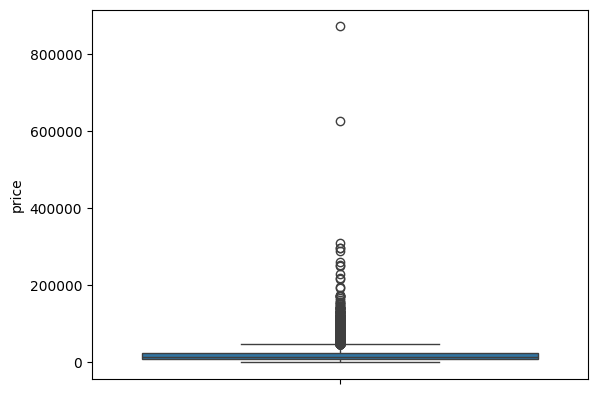

In [ ]:
plt.figure()
sns.boxplot(Car_Prices_Data['price'])
plt.show()

- there are other values are unlogical which price is lower than 1000$ so I will delete them

In [ ]:
Car_Prices_Data=Car_Prices_Data[Car_Prices_Data['price']>1000]

In [ ]:
Car_Prices_Data.shape

(14313, 20)

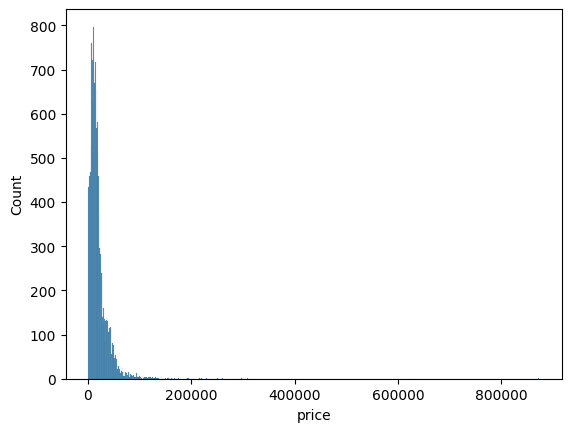

In [ ]:
plt.figure()
sns.histplot(data=Car_Prices_Data,x='price')
plt.show()

In [ ]:
Car_Prices_Data.describe()

,price,engine volume,mileage in km,cylinders,airbags,no of years,front and beside doors,back doors
count,14313.000000,14313.000000,1.431300e+04,14313.000000,14313.000000,14313.000000,14313.000000,14313.0
mean,20392.313491,2.197625,1.772559e+06,4.461399,6.339342,14.577796,4.025362,1.0
std,20608.986273,0.790005,5.234955e+07,1.121245,3.926384,5.979303,0.157226,0.0
min,1019.000000,0.100000,0.000000e+00,1.000000,0.000000,5.000000,4.000000,1.0
25%,9408.000000,1.700000,6.655800e+04,4.000000,4.000000,11.000000,4.000000,1.0
50%,15681.000000,2.000000,1.200000e+05,4.000000,4.000000,13.000000,4.000000,1.0
75%,24462.000000,2.500000,1.780000e+05,4.000000,10.000000,17.000000,4.000000,1.0
max,872946.000000,20.000000,2.147484e+09,16.000000,16.000000,82.000000,5.000000,1.0


- let's see which is the value that more than 600000

In [ ]:
Car_Prices_Data[Car_Prices_Data['price']>600000]

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,wheel,color,airbags,no of years,engine with turbo,front and beside doors,back doors
1225,627220,-,mercedes-benz,g 65 amg 63amg,2020,jeep,yes,petrol,6.3,0,8.0,tiptronic,4x4,left wheel,black,12,5,yes,4,1
8541,872946,2067,lamborghini,urus,2019,universal,yes,petrol,4.0,2531,8.0,tiptronic,4x4,left wheel,black,0,6,no,4,1


In [ ]:
Car_Prices_Data[Car_Prices_Data['engine volume']==4.0]['price'].describe()

,price
count,78.000000
mean,43631.987179
std,108851.037640
min,1882.000000
25%,9556.000000
50%,19350.000000
75%,30602.750000
max,872946.000000


In [ ]:
Car_Prices_Data[Car_Prices_Data['engine volume']==6.3]['price'].describe()

,price
count,6.000000
mean,137413.500000
std,242698.606086
min,5331.000000
25%,22737.000000
50%,30890.500000
75%,90320.000000
max,627220.000000


- in two rows price goes out of normal range so I will drop it

In [ ]:
Car_Prices_Data[Car_Prices_Data['price']>=600000]

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,wheel,color,airbags,no of years,engine with turbo,front and beside doors,back doors
1225,627220,-,mercedes-benz,g 65 amg 63amg,2020,jeep,yes,petrol,6.3,0,8.0,tiptronic,4x4,left wheel,black,12,5,yes,4,1
8541,872946,2067,lamborghini,urus,2019,universal,yes,petrol,4.0,2531,8.0,tiptronic,4x4,left wheel,black,0,6,no,4,1


In [ ]:
Car_Prices_Data=Car_Prices_Data.drop([1225,8541],axis=0)

In [ ]:
Car_Prices_Data[Car_Prices_Data['price']>=600000]

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,wheel,color,airbags,no of years,engine with turbo,front and beside doors,back doors


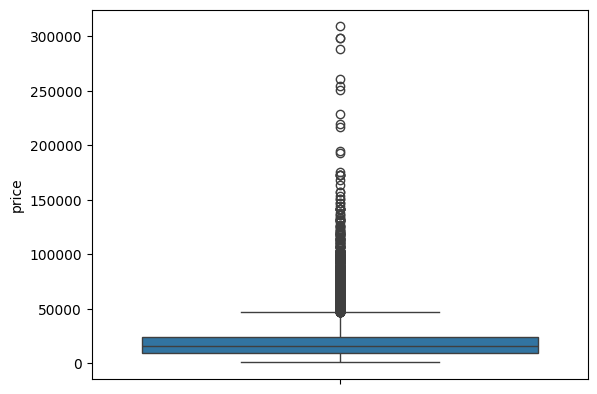

In [ ]:
plt.figure()
sns.boxplot(Car_Prices_Data['price'])
plt.show()

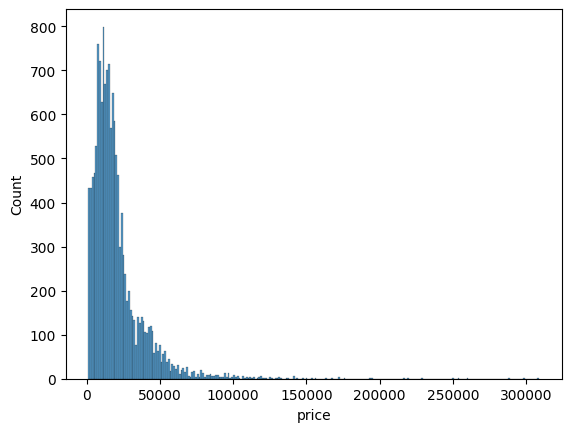

In [ ]:
plt.figure()
sns.histplot(data=Car_Prices_Data,x='price')
plt.show()

In [ ]:
Car_Prices_Data['price'].describe()

,price
count,14311.000000
mean,20290.337293
std,18661.544332
min,1019.000000
25%,9408.000000
50%,15681.000000
75%,24462.000000
max,308906.000000


In [ ]:
Car_Prices_Data[Car_Prices_Data['price']<=1500]

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,wheel,color,airbags,no of years,engine with turbo,front and beside doors,back doors
8,1098,394,toyota,camry,2014,sedan,yes,hybrid,2.5,398069,4.0,automatic,front,left wheel,black,12,11,no,4,1
13,1019,1055,lexus,rx 450,2013,jeep,yes,hybrid,3.5,138038,6.0,automatic,front,left wheel,white,12,12,no,4,1
57,1411,629,nissan,juke,2015,jeep,yes,petrol,1.6,87112,4.0,automatic,4x4,left wheel,black,0,10,no,4,1
107,1019,917,bmw,x5,2013,jeep,yes,diesel,3.0,137802,6.0,automatic,4x4,left wheel,black,12,12,no,4,1
116,1254,-,mitsubishi,lancer,1997,sedan,no,petrol,1.3,100000,4.0,manual,rear,left wheel,red,0,28,no,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18734,1019,810,hyundai,elantra,2016,sedan,yes,petrol,1.8,73022,4.0,automatic,front,left wheel,black,12,9,no,4,1
18933,1176,475,fiat,500,2012,hatchback,yes,petrol,1.4,172315,4.0,automatic,front,left wheel,brown,12,13,no,4,1
18999,1176,753,kia,optima,2012,sedan,yes,petrol,2.4,133605,4.0,automatic,front,left wheel,black,12,13,no,4,1
19053,1176,697,honda,civic,2015,sedan,yes,petrol,1.8,60651,4.0,automatic,front,left wheel,grey,12,10,no,4,1


- alot of them is unrealistic so I will drop them

In [ ]:
Car_Prices_Data.shape

(14311, 20)

In [ ]:
Car_Prices_Data=Car_Prices_Data[Car_Prices_Data['price']>1500]

In [ ]:
Car_Prices_Data.shape

(14118, 20)

In [ ]:
Car_Prices_Data.describe()

,price,engine volume,mileage in km,cylinders,airbags,no of years,front and beside doors,back doors
count,14118.000000,14118.000000,1.411800e+04,14118.000000,14118.000000,14118.000000,14118.000000,14118.0
mean,20550.814067,2.194950,1.794961e+06,4.460618,6.293738,14.596402,4.025712,1.0
std,18654.294135,0.788252,5.270952e+07,1.121303,3.895996,5.964811,0.158280,0.0
min,1550.000000,0.100000,0.000000e+00,1.000000,0.000000,5.000000,4.000000,1.0
25%,9408.000000,1.600000,6.659750e+04,4.000000,4.000000,11.000000,4.000000,1.0
50%,15681.000000,2.000000,1.200000e+05,4.000000,4.000000,13.000000,4.000000,1.0
75%,24765.750000,2.500000,1.780000e+05,4.000000,10.000000,17.000000,4.000000,1.0
max,308906.000000,20.000000,2.147484e+09,16.000000,16.000000,82.000000,5.000000,1.0


In [ ]:
Car_Prices_Data[Car_Prices_Data['price']>=300000]

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,wheel,color,airbags,no of years,engine with turbo,front and beside doors,back doors
5008,308906,1694,porsche,911,2016,coupe,yes,petrol,4.0,8690,6.0,automatic,rear,left wheel,black,12,9,no,4,1


- it is the onlu one and may has bad effect on model

In [ ]:
Car_Prices_Data=Car_Prices_Data[Car_Prices_Data['price']<300000]

In [ ]:
Car_Prices_Data[Car_Prices_Data['price']>=300000]

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,wheel,color,airbags,no of years,engine with turbo,front and beside doors,back doors


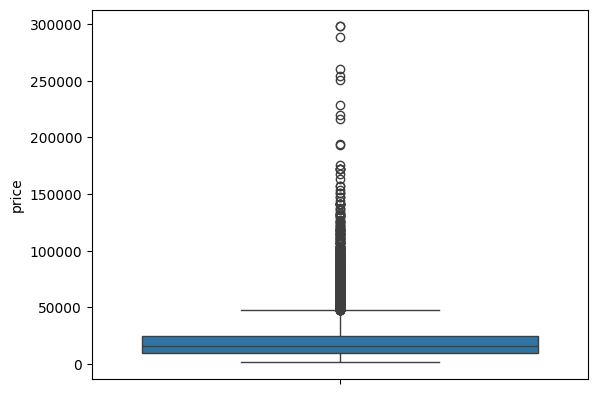

In [ ]:
plt.figure()
sns.boxplot(Car_Prices_Data['price'])
plt.show()

In [ ]:
Car_Prices_Data[Car_Prices_Data['price']>=160000]

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,wheel,color,airbags,no of years,engine with turbo,front and beside doors,back doors
1145,194438,-,mercedes-benz,g 350,2013,jeep,yes,diesel,3.0,94000,6.0,automatic,4x4,left wheel,black,6,12,yes,4,1
2283,219527,-,bentley,continental gt,2012,coupe,yes,petrol,4.0,55500,8.0,tiptronic,4x4,left wheel,black,0,13,yes,4,1
2768,172486,-,toyota,land cruiser,2018,jeep,yes,diesel,4.7,13000,12.0,automatic,4x4,left wheel,white,16,7,yes,4,1
2912,172486,1951,mercedes-benz,s 63 amg,2015,sedan,yes,petrol,5.5,73600,8.0,tiptronic,rear,left wheel,black,16,10,yes,4,1
4722,175622,2819,bentley,mulsanne,2016,sedan,yes,petrol,6.8,6189,8.0,automatic,rear,left wheel,black,12,9,no,4,1
5840,254024,1292,mercedes-benz,gle 400 a m g,2016,jeep,yes,petrol,3.0,73000,6.0,tiptronic,4x4,left wheel,black,12,9,yes,4,1
6468,172486,-,lexus,lx 570,2013,jeep,yes,petrol,5.7,78400,8.0,tiptronic,4x4,left wheel,black,12,12,no,4,1
7283,228935,-,mercedes-benz,gle 63 amg,2018,jeep,yes,petrol,5.5,23000,8.0,tiptronic,4x4,left wheel,black,16,7,yes,4,1
7353,216391,-,mercedes-benz,g 65 amg g63 amg,2013,jeep,yes,petrol,5.5,54000,8.0,tiptronic,4x4,left wheel,black,12,12,yes,4,1
7718,167781,1292,land rover,range rover,2016,jeep,yes,diesel,3.0,81000,6.0,tiptronic,4x4,left wheel,grey,12,9,yes,4,1


- most of data focus on economy cars so cars with prices more than or equal 160000 will be in a very high price and not related to data (I will drop it to not affect bad to model)

In [ ]:
Car_Prices_Data.shape

(14117, 20)

In [ ]:
Car_Prices_Data[Car_Prices_Data['price']>=160000].shape

(18, 20)

In [ ]:
Car_Prices_Data=Car_Prices_Data[Car_Prices_Data['price']<160000]

In [ ]:
Car_Prices_Data.shape

(14099, 20)

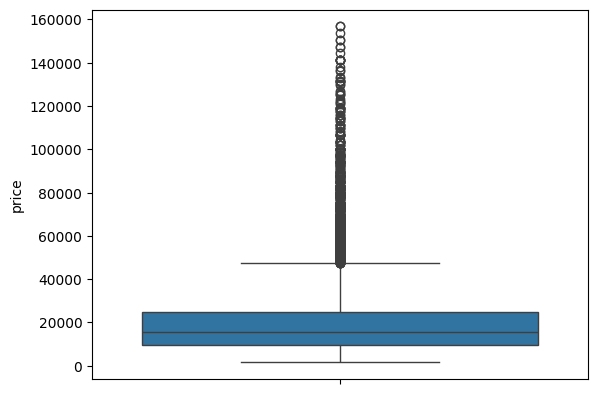

In [ ]:
plt.figure()
sns.boxplot(Car_Prices_Data['price'])
plt.show()

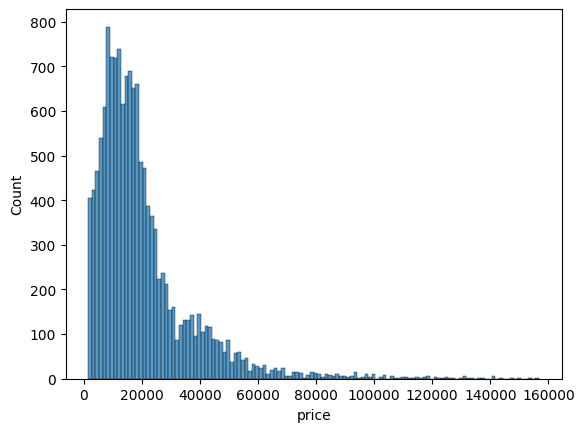

In [ ]:
plt.figure()
sns.histplot(data=Car_Prices_Data,x='price')
plt.show()

## engine volume Column

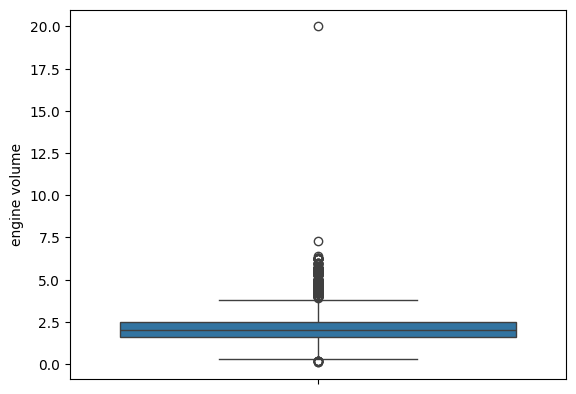

In [ ]:
plt.figure()
sns.boxplot(Car_Prices_Data['engine volume'])
plt.show()

In [ ]:
Car_Prices_Data[Car_Prices_Data['engine volume']>18]

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,wheel,color,airbags,no of years,engine with turbo,front and beside doors,back doors
2357,10036,5603,hyundai,sonata,2014,sedan,yes,lpg,20.0,333686,4.0,automatic,front,left wheel,silver,4,11,no,4,1


- after some search found it data entry error and it must be 2.0

In [ ]:
Car_Prices_Data.loc[Car_Prices_Data['engine volume']>18,'engine volume']=2.0

In [ ]:
Car_Prices_Data['engine volume'].describe()

,engine volume
count,14099.000000
mean,2.191226
std,0.769492
min,0.100000
25%,1.600000
50%,2.000000
75%,2.500000
max,7.300000


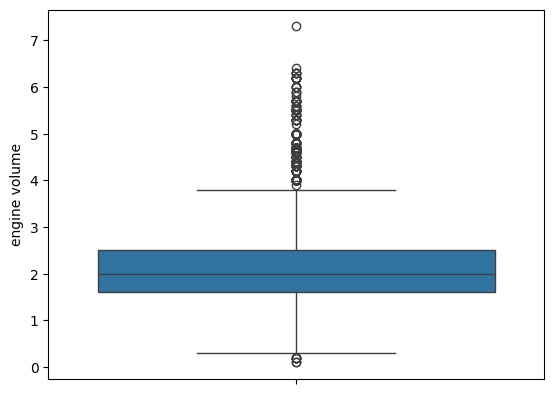

In [ ]:
plt.figure()
sns.boxplot(Car_Prices_Data['engine volume'])
plt.show()

In [ ]:
Car_Prices_Data[Car_Prices_Data['engine volume']>=7.3]

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,wheel,color,airbags,no of years,engine with turbo,front and beside doors,back doors
5367,7840,5877,mercedes-benz,clk 430,2005,cabriolet,no,petrol,7.3,156470,12.0,automatic,rear,left wheel,black,12,20,no,4,1


- wrong value it should be 4.3

In [ ]:
Car_Prices_Data.loc[Car_Prices_Data['engine volume']>=7.3,'engine volume']=4.3

In [ ]:
Car_Prices_Data[Car_Prices_Data['engine volume']>=7.3]

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,wheel,color,airbags,no of years,engine with turbo,front and beside doors,back doors


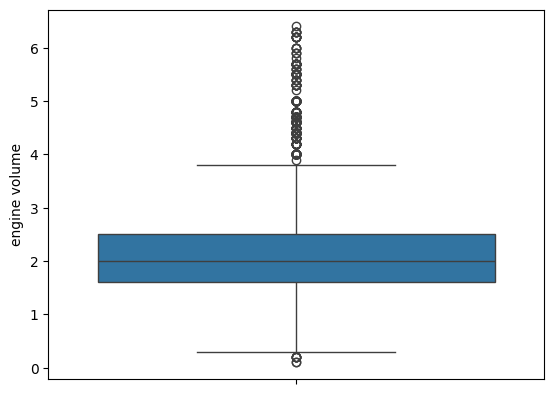

In [ ]:
plt.figure()
sns.boxplot(Car_Prices_Data['engine volume'])
plt.show()

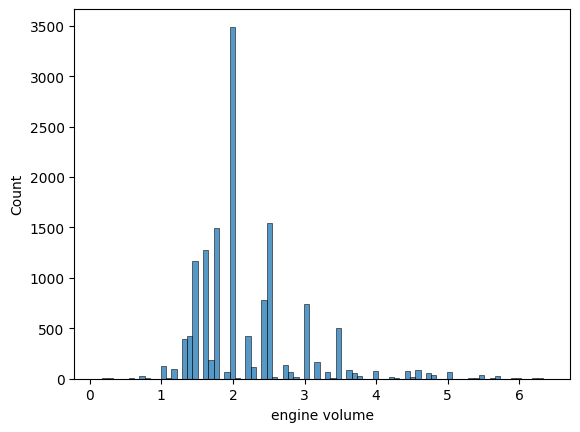

In [ ]:
plt.figure()
sns.histplot(Car_Prices_Data['engine volume'])
plt.show()

In [ ]:
Car_Prices_Data.describe()

,price,engine volume,mileage in km,cylinders,airbags,no of years,front and beside doors,back doors
count,14099.000000,14099.000000,1.409900e+04,14099.000000,14099.000000,14099.000000,14099.000000,14099.0
mean,20280.112987,2.191014,1.797321e+06,4.456557,6.286971,14.603944,4.025747,1.0
std,17049.165349,0.768494,5.274498e+07,1.115355,3.890680,5.964764,0.158384,0.0
min,1550.000000,0.100000,0.000000e+00,1.000000,0.000000,5.000000,4.000000,1.0
25%,9408.000000,1.600000,6.676800e+04,4.000000,4.000000,11.000000,4.000000,1.0
50%,15681.000000,2.000000,1.200000e+05,4.000000,4.000000,13.000000,4.000000,1.0
75%,24621.500000,2.500000,1.780000e+05,4.000000,10.000000,17.000000,4.000000,1.0
max,156805.000000,6.400000,2.147484e+09,16.000000,16.000000,82.000000,5.000000,1.0


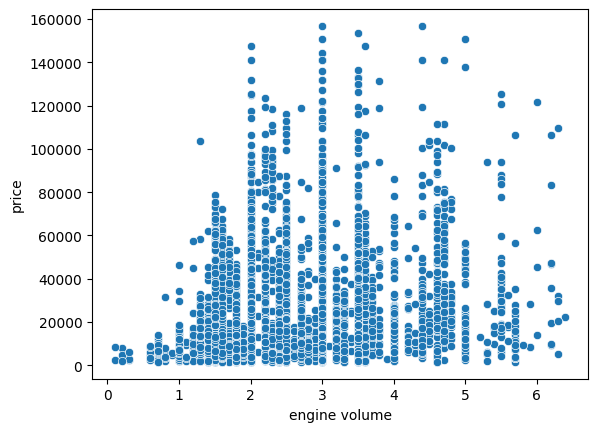

In [ ]:
plt.figure()
sns.scatterplot(data=Car_Prices_Data , x=Car_Prices_Data['engine volume'],y=Car_Prices_Data['price'])
plt.show()

## mileage in Km Column

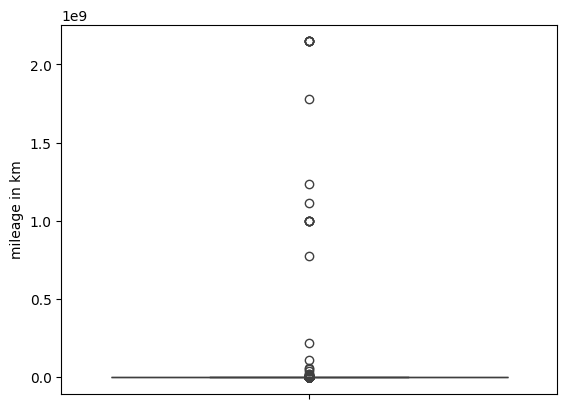

In [ ]:
plt.figure()
sns.boxplot(Car_Prices_Data['mileage in km'])
plt.show()

In [ ]:
Car_Prices_Data[Car_Prices_Data['mileage in km']>=1000000000]

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,wheel,color,airbags,no of years,engine with turbo,front and beside doors,back doors
2278,6899,-,volkswagen,golf,1999,sedan,no,petrol,1.6,2147483647,4.0,manual,front,left wheel,black,4,26,no,4,1
6157,5959,-,mercedes-benz,c 180,1995,sedan,no,cng,1.8,2147483647,4.0,manual,rear,left wheel,blue,5,30,no,4,1
7724,4800,-,opel,corsa,1999,sedan,no,petrol,1.2,1234567899,4.0,manual,front,left wheel,silver,2,26,no,4,1
11901,10036,-,subaru,forester,2005,jeep,no,petrol,2.0,2147483647,4.0,tiptronic,4x4,right-hand drive,white,12,20,no,4,1
12734,2200,-,uaz,31514,1968,jeep,yes,cng,2.4,2147483647,4.0,manual,4x4,left wheel,black,10,57,no,4,1
15393,15681,-,toyota,prius,2008,sedan,no,petrol,2.0,2147483647,4.0,automatic,front,left wheel,blue,0,17,no,4,1
17582,4234,-,mercedes-benz,e 200,2001,sedan,yes,cng,2.6,1777777778,6.0,tiptronic,rear,right-hand drive,black,10,24,no,4,1
19167,18817,1995,ford,transit,2003,microbus,no,diesel,2.4,2147483647,4.0,manual,front,left wheel,white,2,22,yes,5,1
19199,3763,-,mercedes-benz,c 180,1995,sedan,no,petrol,1.8,1111111111,5.0,manual,rear,right-hand drive,green,2,30,no,4,1


- all these values are not logical I will drop them

In [ ]:
Car_Prices_Data.shape

(14099, 20)

In [ ]:
Car_Prices_Data=Car_Prices_Data[~(Car_Prices_Data['mileage in km']>=1000000000)]

In [ ]:
Car_Prices_Data.shape

(14090, 20)

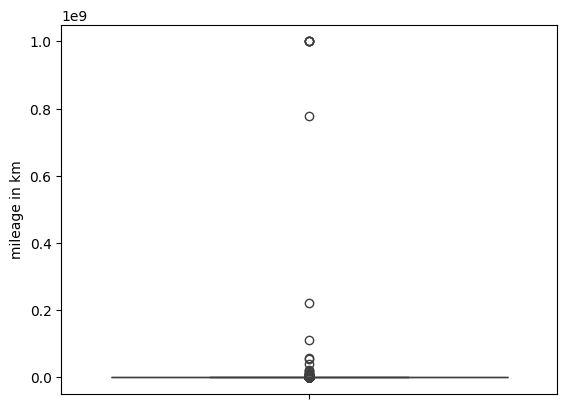

In [ ]:
plt.figure()
sns.boxplot(Car_Prices_Data['mileage in km'])
plt.show()

In [ ]:
Car_Prices_Data[Car_Prices_Data['mileage in km']>=100000000]

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,wheel,color,airbags,no of years,engine with turbo,front and beside doors,back doors
985,2700,-,opel,vectra,1997,sedan,no,cng,1.6,777777777,4.0,automatic,front,left wheel,beige,2,28,no,4,1
5456,12544,-,nissan,x-terra,2004,jeep,no,cng,3.3,999999999,6.0,tiptronic,4x4,left wheel,black,8,21,no,4,1
10667,6476,-,nissan,note,2008,hatchback,no,cng,1.5,999999999,4.0,automatic,4x4,right-hand drive,black,0,17,no,4,1
12591,2600,1529,opel,vectra,1995,sedan,no,cng,1.8,999999999,4.0,manual,front,left wheel,green,4,30,no,4,1
12904,4077,-,volkswagen,golf,1997,hatchback,no,cng,1.8,999999999,4.0,manual,front,left wheel,carnelian red,0,28,no,4,1
15364,10036,-,opel,meriva,2006,universal,no,petrol,1.6,222222222,4.0,tiptronic,front,left wheel,silver,6,19,no,4,1
16586,14113,-,bmw,328,2007,sedan,yes,petrol,3.0,999999999,6.0,tiptronic,rear,left wheel,silver,16,18,no,4,1
18477,10976,-,mercedes-benz,e 270,2002,sedan,yes,diesel,2.7,111111111,6.0,tiptronic,rear,left wheel,silver,6,23,yes,4,1


- not logical also

In [ ]:
Car_Prices_Data.shape

(14090, 20)

In [ ]:
Car_Prices_Data=Car_Prices_Data[~(Car_Prices_Data['mileage in km']>=100000000)]

In [ ]:
Car_Prices_Data.shape

(14082, 20)

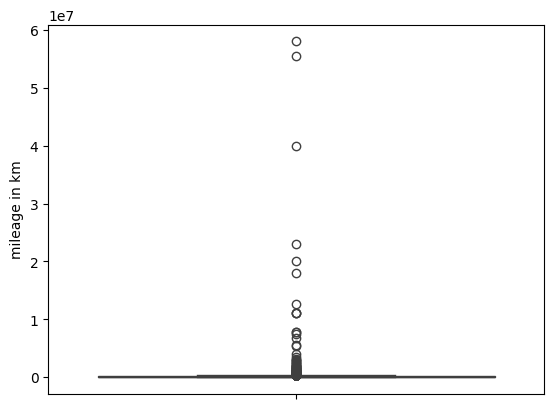

In [ ]:
plt.figure()
sns.boxplot(Car_Prices_Data['mileage in km'])
plt.show()

In [ ]:
Car_Prices_Data[Car_Prices_Data['mileage in km']>=10000000]

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,wheel,color,airbags,no of years,engine with turbo,front and beside doors,back doors
1404,9095,-,bmw,328,2002,sedan,no,petrol,2.8,55556665,6.0,manual,rear,left wheel,silver,6,23,no,4,1
1892,7213,-,mercedes-benz,c 180,1997,sedan,no,petrol,1.8,11111111,4.0,manual,rear,left wheel,silver,2,28,no,4,1
4823,3000,-,uaz,31514,1991,coupe,no,petrol,1.8,12648846,4.0,manual,4x4,left wheel,green,0,34,no,4,1
8824,5018,-,mitsubishi,colt,2002,sedan,no,petrol,1.5,18065445,4.0,tiptronic,front,right-hand drive,black,5,23,no,4,1
8858,5500,-,ford,transit,1991,microbus,no,diesel,2.5,11111111,4.0,manual,rear,left wheel,white,0,34,no,5,1
9542,8467,-,subaru,legacy,2004,sedan,yes,petrol,2.0,20000000,4.0,tiptronic,4x4,right-hand drive,black,3,21,no,4,1
11144,6272,-,mercedes-benz,c 180,1995,sedan,no,cng,2.0,58008888,4.0,manual,rear,left wheel,blue,2,30,no,4,1
11430,3800,-,mazda,protege,2001,sedan,no,petrol,1.6,11111111,4.0,automatic,front,left wheel,white,2,24,no,4,1
11472,2300,-,suzuki,swift,2005,hatchback,no,petrol,1.3,23000000,4.0,manual,4x4,right-hand drive,silver,7,20,no,4,1
17206,2822,-,ford,mondeo,1996,goods wagon,no,cng,1.8,40000000,4.0,manual,front,left wheel,green,4,29,no,4,1


- also not logical

In [ ]:
Car_Prices_Data.shape

(14082, 20)

In [ ]:
Car_Prices_Data=Car_Prices_Data[~(Car_Prices_Data['mileage in km']>=10000000)]

In [ ]:
Car_Prices_Data.shape

(14072, 20)

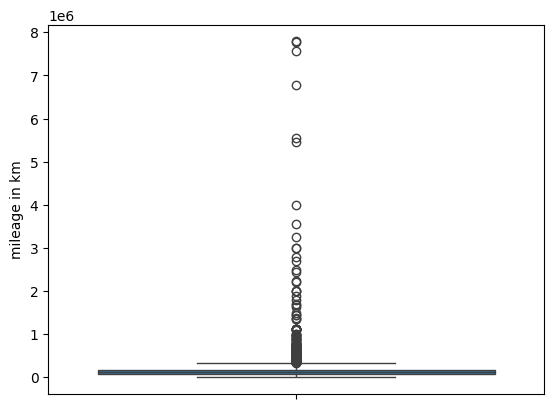

In [ ]:
plt.figure()
sns.boxplot(Car_Prices_Data['mileage in km'])
plt.show()

In [ ]:
Car_Prices_Data[(Car_Prices_Data['mileage in km']>=1000000)]

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,wheel,color,airbags,no of years,engine with turbo,front and beside doors,back doors
144,4300,-,mercedes-benz,208,1985,universal,no,diesel,2.5,1111111,4.0,manual,rear,left wheel,black,1,40,no,4,1
493,15994,777,toyota,camry,2014,sedan,no,petrol,2.5,1440000,4.0,automatic,front,left wheel,silver,0,11,no,4,1
1146,13485,-,bmw,525,2003,sedan,yes,petrol,2.5,7777787,6.0,manual,rear,left wheel,silver,10,22,no,4,1
1806,6272,-,mercedes-benz,230,1996,sedan,no,cng,2.3,4000000,6.0,automatic,rear,left wheel,green,4,29,no,4,1
2512,15681,-,bmw,x5,2005,jeep,yes,petrol,4.4,7789999,6.0,automatic,rear,left wheel,brown,0,20,no,4,1
2666,3000,-,volkswagen,jetta,1995,sedan,no,cng,1.8,1101001,4.0,manual,front,left wheel,white,1,30,no,4,1
3781,9408,-,ford,transit,1998,microbus,no,diesel,2.5,2222222,4.0,manual,rear,left wheel,white,2,27,yes,5,1
3895,13172,-,honda,civic,2008,sedan,no,hybrid,1.3,2432000,4.0,variator,front,left wheel,grey,4,17,no,4,1
4174,4077,-,bmw,520,1995,sedan,no,petrol,2.0,1111111,6.0,manual,rear,left wheel,black,2,30,no,4,1
5228,5018,-,mercedes-benz,smart,2004,hatchback,no,petrol,1.3,1000900,4.0,tiptronic,front,right-hand drive,black,8,21,no,4,1


- numbers more than 1000000 not logical for me

In [ ]:
Car_Prices_Data.shape

(14072, 20)

In [ ]:
Car_Prices_Data=Car_Prices_Data[~(Car_Prices_Data['mileage in km']>1000000)]

In [ ]:
Car_Prices_Data.shape

(14031, 20)

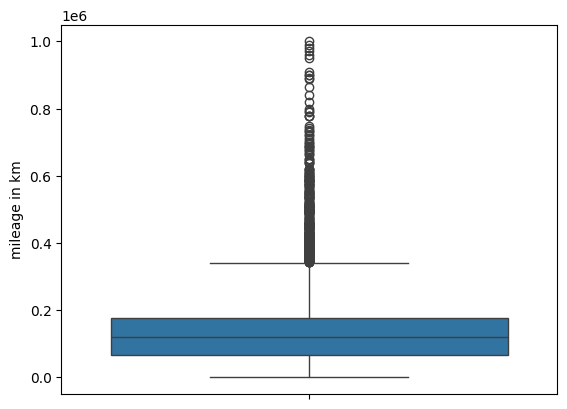

In [ ]:
plt.figure()
sns.boxplot(Car_Prices_Data['mileage in km'])
plt.show()

In [ ]:
Car_Prices_Data[(Car_Prices_Data['mileage in km']>800000)]

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,wheel,color,airbags,no of years,engine with turbo,front and beside doors,back doors
1170,15053,584,hyundai,elantra,2014,sedan,no,petrol,1.8,990000,4.0,tiptronic,front,left wheel,silver,6,11,no,4,1
1254,14113,-,land rover,range rover,1996,jeep,yes,diesel,2.5,888888,4.0,manual,4x4,left wheel,blue,0,29,yes,4,1
1893,10349,1267,toyota,aqua,2013,sedan,no,hybrid,1.5,970000,4.0,variator,front,right-hand drive,silver,2,12,no,4,1
2075,30800,1058,mercedes-benz,e 350,2012,sedan,yes,petrol,3.5,890000,6.0,tiptronic,rear,left wheel,grey,12,13,no,4,1
3177,27911,1172,lexus,rx 350,2011,jeep,yes,petrol,3.5,900000,12.0,tiptronic,front,left wheel,black,12,14,no,4,1
5346,21012,1051,kia,optima,2016,sedan,no,petrol,2.4,910000,4.0,tiptronic,front,left wheel,black,8,9,no,4,1
7067,37633,779,toyota,rav 4,2013,jeep,no,petrol,2.5,900000,4.0,tiptronic,4x4,left wheel,green,8,12,no,4,1
7272,35438,-,bmw,x6,2009,jeep,yes,petrol,4.4,960000,8.0,tiptronic,4x4,left wheel,silver,12,16,yes,4,1
7763,10976,645,hyundai,elantra,2011,sedan,no,petrol,1.8,820000,4.0,tiptronic,front,left wheel,silver,6,14,no,4,1
8876,10976,-,mazda,rx-8,2003,coupe,yes,petrol,1.3,950000,2.0,manual,rear,left wheel,black,6,22,no,4,1


- it still so extrem values

In [ ]:
Car_Prices_Data.shape

(14031, 20)

In [ ]:
Car_Prices_Data=Car_Prices_Data[~(Car_Prices_Data['mileage in km']>=800000)]

In [ ]:
Car_Prices_Data.shape

(14016, 20)

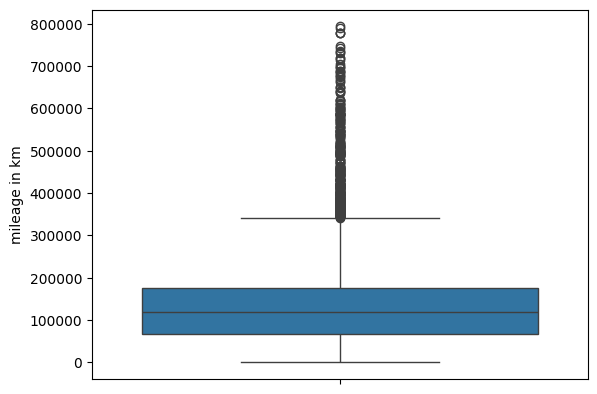

In [ ]:
plt.figure()
sns.boxplot(Car_Prices_Data['mileage in km'])
plt.show()

In [ ]:
Car_Prices_Data[(Car_Prices_Data['mileage in km']>=700000)]

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,wheel,color,airbags,no of years,engine with turbo,front and beside doors,back doors
65,9722,765,hyundai,sonata,2015,sedan,yes,lpg,2.0,719847,4.0,automatic,front,left wheel,orange,4,10,no,4,1
169,7840,-,mercedes-benz,e 240 e 240,1998,sedan,yes,petrol,2.4,777777,6.0,manual,rear,left wheel,blue,4,27,no,4,1
1053,10036,639,hyundai,sonata,2014,sedan,yes,lpg,2.0,793967,4.0,automatic,front,left wheel,silver,4,11,no,4,1
1765,14113,-,mercedes-benz,e 220,2011,sedan,yes,diesel,2.2,700000,4.0,manual,rear,left wheel,white,12,14,yes,4,1
2274,10036,639,hyundai,sonata,2014,sedan,yes,lpg,2.0,746740,4.0,automatic,front,left wheel,silver,4,11,no,4,1
2961,9722,765,hyundai,sonata,2015,sedan,yes,lpg,2.0,705856,4.0,automatic,front,left wheel,orange,4,10,no,4,1
4009,12544,765,hyundai,sonata,2015,sedan,yes,lpg,2.0,732232,4.0,automatic,front,left wheel,orange,4,10,no,4,1
4941,5331,836,hyundai,sonata,2010,sedan,yes,lpg,2.0,731513,4.0,automatic,front,left wheel,silver,4,15,no,4,1
5788,4704,-,mercedes-benz,e 200,1996,sedan,no,cng,2.0,777777,4.0,manual,rear,left wheel,silver,4,29,no,4,1
10222,6586,642,hyundai,sonata,2012,sedan,yes,lpg,2.0,742997,4.0,automatic,front,left wheel,silver,4,13,no,4,1


- it is may be logical in some times but to avoid high bias I'd prefer to has cars no more than 5000000

In [ ]:
Car_Prices_Data.shape

(14016, 20)

In [ ]:
Car_Prices_Data=Car_Prices_Data[~(Car_Prices_Data['mileage in km']>500000)]

In [ ]:
Car_Prices_Data.shape

(13901, 20)

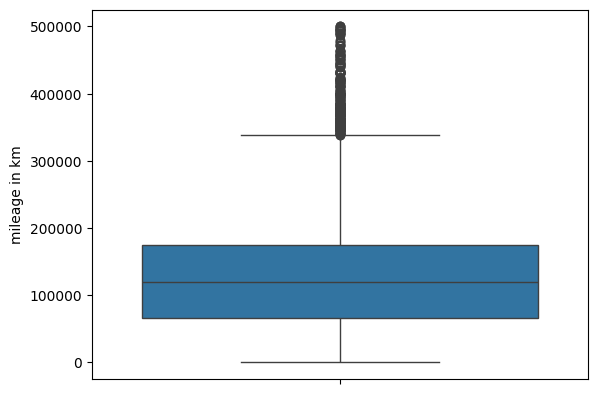

In [ ]:
plt.figure()
sns.boxplot(Car_Prices_Data['mileage in km'])
plt.show()

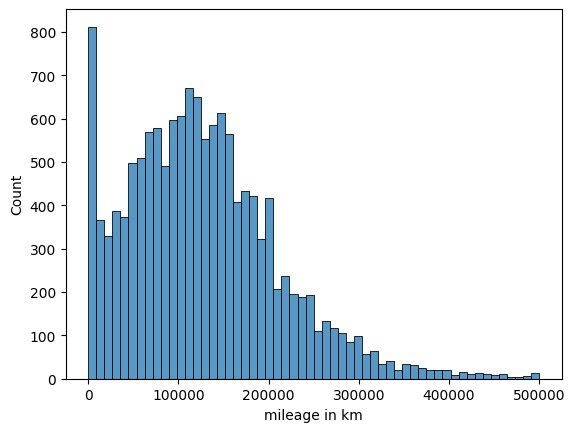

In [ ]:
plt.figure()
sns.histplot(Car_Prices_Data['mileage in km'])
plt.show()

- The distribution is more normal now and more than 400000 may be for people travel alot so having some of these values may help us to predict prices for these cars

In [ ]:
Car_Prices_Data.describe()

,price,engine volume,mileage in km,cylinders,airbags,no of years,front and beside doors,back doors
count,13901.000000,13901.000000,13901.000000,13901.000000,13901.000000,13901.000000,13901.000000,13901.0
mean,20420.225523,2.192447,127398.137904,4.459032,6.312352,14.576433,4.025394,1.0
std,17112.626371,0.770792,84509.693109,1.116905,3.898845,5.923226,0.157324,0.0
min,1550.000000,0.100000,0.000000,1.000000,0.000000,5.000000,4.000000,1.0
25%,9512.000000,1.600000,66000.000000,4.000000,4.000000,11.000000,4.000000,1.0
50%,15991.000000,2.000000,119000.000000,4.000000,4.000000,13.000000,4.000000,1.0
75%,24775.000000,2.500000,174712.000000,4.000000,10.000000,17.000000,4.000000,1.0
max,156805.000000,6.400000,500000.000000,16.000000,16.000000,82.000000,5.000000,1.0


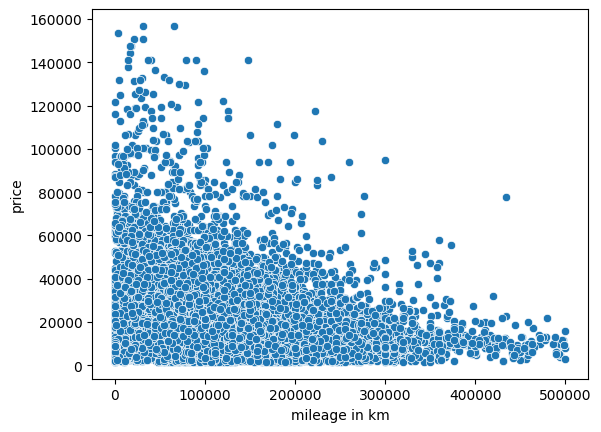

In [ ]:
plt.figure()
sns.scatterplot(data=Car_Prices_Data , x=Car_Prices_Data['mileage in km'],y=Car_Prices_Data['price'])
plt.show()

## Cylinders

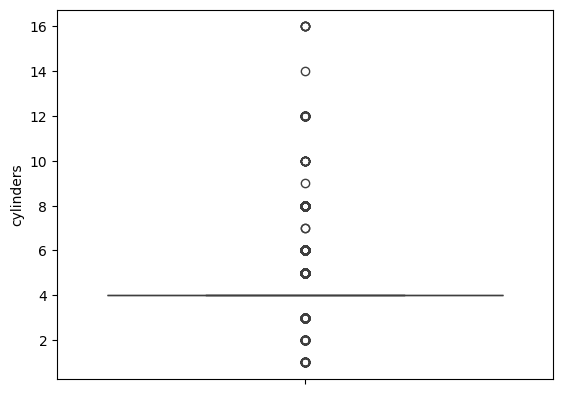

In [ ]:
plt.figure()
sns.boxplot(Car_Prices_Data['cylinders'])
plt.show()

In [ ]:
Car_Prices_Data[(Car_Prices_Data['cylinders']<3)]

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,wheel,color,airbags,no of years,engine with turbo,front and beside doors,back doors
54,38500,639,audi,q5,2014,jeep,yes,petrol,2.0,87000,1.0,tiptronic,4x4,left wheel,white,12,11,no,4,1
400,7840,-,mercedes-benz,e 250,1995,sedan,no,diesel,2.5,410918,2.0,manual,front,left wheel,white,2,30,no,4,1
500,21953,-,hyundai,sonata,2013,sedan,no,hybrid,2.4,20000,2.0,tiptronic,front,right-hand drive,black,4,12,yes,4,1
1101,11000,-,toyota,prius,2008,hatchback,no,hybrid,1.5,182000,2.0,automatic,front,left wheel,brown,6,17,no,4,1
1686,23521,-,mitsubishi,l 200,2008,pickup,no,diesel,2.5,320582,1.0,manual,4x4,left wheel,silver,0,17,no,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17647,1700,-,vaz,2106,1988,sedan,no,petrol,1.6,0,2.0,manual,front,left wheel,black,2,37,no,4,1
17829,2100,-,nissan,march,2002,sedan,no,petrol,1.2,140000,2.0,automatic,front,right-hand drive,sky blue,0,23,no,4,1
17896,20385,-,ford,transit,2007,microbus,no,diesel,2.4,0,2.0,manual,front,left wheel,silver,0,18,no,5,1
18781,10036,-,greatwall,c30,2014,sedan,no,petrol,1.5,77666,1.0,manual,front,left wheel,white,0,11,no,4,1


- after some search on data manufacturer , model and cars in all , There is not a cylinders under 3 in any of those and cylinder is an effective column in pricing also I do not have a source or client to get back and fix these values , Then my decision is drop them

In [ ]:
Car_Prices_Data.shape

(13901, 20)

In [ ]:
Car_Prices_Data=Car_Prices_Data[~(Car_Prices_Data['cylinders']<3)]

In [ ]:
Car_Prices_Data.shape

(13833, 20)

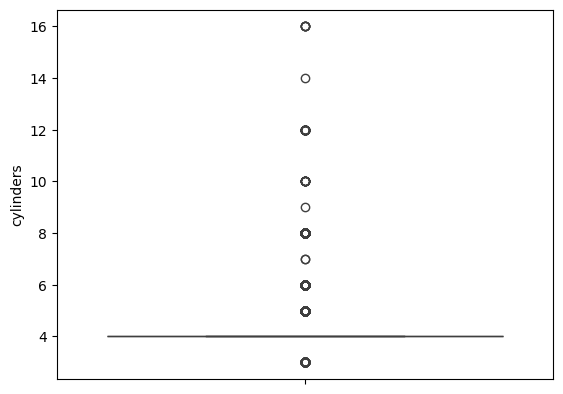

In [ ]:
plt.figure()
sns.boxplot(Car_Prices_Data['cylinders'])
plt.show()

- more than 12 is unligical value for normal cars so I will fix this

### fix values more than 12

In [ ]:
Car_Prices_Data[(Car_Prices_Data['cylinders']>12)]

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,wheel,color,airbags,no of years,engine with turbo,front and beside doors,back doors
456,11604,993,opel,astra,2006,goods wagon,no,diesel,1.3,27000,16.0,manual,front,left wheel,black,8,19,yes,4,1
1917,7000,-,honda,fit aria,2003,hatchback,no,petrol,1.5,140203,16.0,automatic,front,right-hand drive,silver,2,22,yes,4,1
6863,21953,-,hyundai,elantra,2016,sedan,yes,petrol,1.8,69000,16.0,automatic,front,left wheel,silver,16,9,no,4,1
8358,15681,966,chevrolet,lacetti,2009,sedan,yes,diesel,2.0,6500,14.0,automatic,front,left wheel,white,8,16,no,4,1
12550,39829,-,bmw,x6,2009,jeep,yes,petrol,3.5,152000,16.0,tiptronic,4x4,left wheel,grey,16,16,yes,4,1
16487,7213,-,opel,combo,2001,goods wagon,no,diesel,1.7,242701,16.0,manual,front,left wheel,blue,2,24,yes,4,1


- more than 16 is a value error so let's try to fix this

In [ ]:
Car_Prices_Data[
    (Car_Prices_Data['manufacturer']=='opel')&(Car_Prices_Data['model']=='astra')&(Car_Prices_Data['category']=='goods wagon')
    ]['cylinders'].value_counts()

,count
cylinders,
4.0,33
16.0,1


- Fix 16 with 4

In [ ]:
Car_Prices_Data.loc[
    (Car_Prices_Data['manufacturer']=='opel')&(Car_Prices_Data['model']=='astra')&(Car_Prices_Data['category']=='goods wagon'),'cylinders'
    ]=4

In [ ]:
Car_Prices_Data[(Car_Prices_Data['cylinders']>12)]

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,wheel,color,airbags,no of years,engine with turbo,front and beside doors,back doors
1917,7000,-,honda,fit aria,2003,hatchback,no,petrol,1.5,140203,16.0,automatic,front,right-hand drive,silver,2,22,yes,4,1
6863,21953,-,hyundai,elantra,2016,sedan,yes,petrol,1.8,69000,16.0,automatic,front,left wheel,silver,16,9,no,4,1
8358,15681,966,chevrolet,lacetti,2009,sedan,yes,diesel,2.0,6500,14.0,automatic,front,left wheel,white,8,16,no,4,1
12550,39829,-,bmw,x6,2009,jeep,yes,petrol,3.5,152000,16.0,tiptronic,4x4,left wheel,grey,16,16,yes,4,1
16487,7213,-,opel,combo,2001,goods wagon,no,diesel,1.7,242701,16.0,manual,front,left wheel,blue,2,24,yes,4,1


In [ ]:
Car_Prices_Data[
    (Car_Prices_Data['manufacturer']=='honda')&(Car_Prices_Data['model']=='fit aria')&(Car_Prices_Data['category']=='hatchback')
    ]['cylinders'].value_counts()

,count
cylinders,
16.0,1
4.0,1


In [ ]:
Car_Prices_Data.loc[
    (Car_Prices_Data['manufacturer']=='honda')&(Car_Prices_Data['model']=='fit aria')&(Car_Prices_Data['category']=='hatchback')
    ,'cylinders']=4

In [ ]:
Car_Prices_Data[(Car_Prices_Data['cylinders']>12)]

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,wheel,color,airbags,no of years,engine with turbo,front and beside doors,back doors
6863,21953,-,hyundai,elantra,2016,sedan,yes,petrol,1.8,69000,16.0,automatic,front,left wheel,silver,16,9,no,4,1
8358,15681,966,chevrolet,lacetti,2009,sedan,yes,diesel,2.0,6500,14.0,automatic,front,left wheel,white,8,16,no,4,1
12550,39829,-,bmw,x6,2009,jeep,yes,petrol,3.5,152000,16.0,tiptronic,4x4,left wheel,grey,16,16,yes,4,1
16487,7213,-,opel,combo,2001,goods wagon,no,diesel,1.7,242701,16.0,manual,front,left wheel,blue,2,24,yes,4,1


In [ ]:
Car_Prices_Data[
    (Car_Prices_Data['manufacturer']=='hyundai')&(Car_Prices_Data['model']=='elantra')&(Car_Prices_Data['category']=='sedan')
    ]['cylinders'].value_counts()

,count
cylinders,
4.0,613
6.0,4
16.0,1


In [ ]:
Car_Prices_Data[
    (Car_Prices_Data['manufacturer']=='hyundai')&(Car_Prices_Data['model']=='elantra')&(Car_Prices_Data['category']=='sedan')&(Car_Prices_Data['production year']==2016)
    ]['cylinders'].value_counts()

,count
cylinders,
4.0,74
16.0,1


In [ ]:
Car_Prices_Data.loc[
    (Car_Prices_Data['manufacturer']=='hyundai')&(Car_Prices_Data['model']=='elantra')&(Car_Prices_Data['category']=='sedan')&(
        Car_Prices_Data['production year']==2016)
    ,'cylinders']=4

In [ ]:
Car_Prices_Data[
    (Car_Prices_Data['manufacturer']=='hyundai')&(Car_Prices_Data['model']=='elantra')&(Car_Prices_Data['category']=='sedan')
    ]['cylinders'].value_counts()

,count
cylinders,
4.0,614
6.0,4


In [ ]:
Car_Prices_Data[(Car_Prices_Data['cylinders']>12)]

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,wheel,color,airbags,no of years,engine with turbo,front and beside doors,back doors
8358,15681,966,chevrolet,lacetti,2009,sedan,yes,diesel,2.0,6500,14.0,automatic,front,left wheel,white,8,16,no,4,1
12550,39829,-,bmw,x6,2009,jeep,yes,petrol,3.5,152000,16.0,tiptronic,4x4,left wheel,grey,16,16,yes,4,1
16487,7213,-,opel,combo,2001,goods wagon,no,diesel,1.7,242701,16.0,manual,front,left wheel,blue,2,24,yes,4,1


In [ ]:
Car_Prices_Data[
    (Car_Prices_Data['manufacturer']=='chevrolet')&(Car_Prices_Data['model']=='lacetti')&(Car_Prices_Data['category']=='sedan')
    ]['cylinders'].value_counts()

,count
cylinders,
4.0,36
14.0,1


In [ ]:
Car_Prices_Data.loc[
    (Car_Prices_Data['manufacturer']=='chevrolet')&(Car_Prices_Data['model']=='lacetti')&(Car_Prices_Data['category']=='sedan')
    ,'cylinders']=4

In [ ]:
Car_Prices_Data[(Car_Prices_Data['cylinders']>12)]

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,wheel,color,airbags,no of years,engine with turbo,front and beside doors,back doors
12550,39829,-,bmw,x6,2009,jeep,yes,petrol,3.5,152000,16.0,tiptronic,4x4,left wheel,grey,16,16,yes,4,1
16487,7213,-,opel,combo,2001,goods wagon,no,diesel,1.7,242701,16.0,manual,front,left wheel,blue,2,24,yes,4,1


In [ ]:
Car_Prices_Data[
    (Car_Prices_Data['manufacturer']=='bmw')&(Car_Prices_Data['model']=='x6')&(Car_Prices_Data['category']=='jeep')
    ]['cylinders'].value_counts()

,count
cylinders,
6.0,22
8.0,11
16.0,1


In [ ]:
Car_Prices_Data[
    (Car_Prices_Data['manufacturer']=='bmw')&(Car_Prices_Data['model']=='x6')&(Car_Prices_Data['category']=='jeep')
    &(Car_Prices_Data['production year']==2009)
    ]['cylinders'].value_counts()

,count
cylinders,
6.0,4
8.0,3
16.0,1


In [ ]:
# I will get the mode
Car_Prices_Data.loc[
    (Car_Prices_Data['manufacturer']=='bmw')&(Car_Prices_Data['model']=='x6')&(Car_Prices_Data['category']=='jeep')&(
        Car_Prices_Data['cylinders']==16)
    ,'cylinders']=6

In [ ]:
Car_Prices_Data[
    (Car_Prices_Data['manufacturer']=='bmw')&(Car_Prices_Data['model']=='x6')&(Car_Prices_Data['category']=='jeep')
    &(Car_Prices_Data['production year']==2009)
    ]['cylinders'].value_counts()

,count
cylinders,
6.0,5
8.0,3


In [ ]:
Car_Prices_Data[(Car_Prices_Data['cylinders']>12)]

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,wheel,color,airbags,no of years,engine with turbo,front and beside doors,back doors
16487,7213,-,opel,combo,2001,goods wagon,no,diesel,1.7,242701,16.0,manual,front,left wheel,blue,2,24,yes,4,1


In [ ]:
Car_Prices_Data[
    (Car_Prices_Data['manufacturer']=='opel')&(Car_Prices_Data['model']=='combo')&(Car_Prices_Data['category']=='goods wagon')
    ]['cylinders'].value_counts()

,count
cylinders,
4.0,31
16.0,1


In [ ]:
Car_Prices_Data.loc[
    (Car_Prices_Data['manufacturer']=='opel')&(Car_Prices_Data['model']=='combo')&(Car_Prices_Data['category']=='goods wagon')
    ,'cylinders']=4

In [ ]:
Car_Prices_Data[(Car_Prices_Data['cylinders']>12)]

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,wheel,color,airbags,no of years,engine with turbo,front and beside doors,back doors


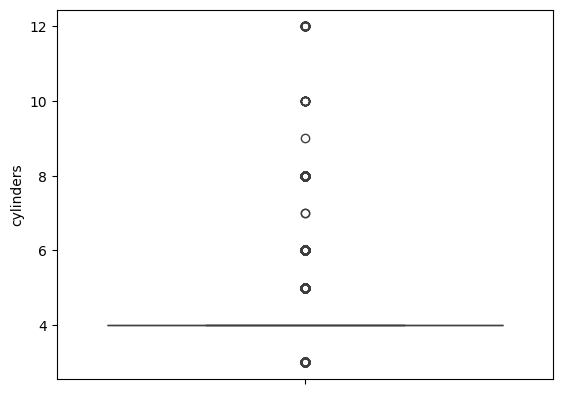

In [ ]:
plt.figure()
sns.boxplot(Car_Prices_Data['cylinders'])
plt.show()

- 10 and 12 cylinder is not a logical value for normal cars so I will fix this

### Fix Values from 10 to 12

In [ ]:
Car_Prices_Data[(Car_Prices_Data['cylinders']>=10)]

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,wheel,color,airbags,no of years,engine with turbo,front and beside doors,back doors
115,11917,11714,mercedes-benz,e 500 amg,2003,sedan,yes,petrol,5.0,150000,12.0,tiptronic,rear,right-hand drive,white,12,22,no,4,1
322,22894,-,nissan,pathfinder,2010,sedan,no,petrol,4.0,109100,12.0,automatic,4x4,left wheel,blue,12,15,no,4,1
724,81539,1360,lexus,gx 460,2013,jeep,yes,petrol,4.6,76800,12.0,tiptronic,4x4,left wheel,black,0,12,no,4,1
820,7997,308,toyota,prius 2014,2014,sedan,yes,hybrid,1.8,0,12.0,tiptronic,front,left wheel,black,12,11,no,4,1
829,30000,-,nissan,x-trail,2018,pickup,yes,petrol,2.5,18794,12.0,automatic,4x4,left wheel,black,12,7,no,4,1
1468,25716,-,toyota,prius plugin,2012,hatchback,no,plug-in hybrid,1.8,75000,12.0,automatic,front,left wheel,silver,10,13,no,4,1
2087,31988,-,mercedes-benz,ml 350,2010,jeep,yes,petrol,3.5,124000,12.0,tiptronic,4x4,left wheel,black,12,15,no,4,1
2991,45473,-,bmw,m5 japan,2006,sedan,yes,petrol,5.0,97000,10.0,manual,rear,left wheel,blue,10,19,no,4,1
4399,21012,-,kia,optima x,2012,sedan,yes,petrol,2.0,155000,12.0,tiptronic,front,left wheel,carnelian red,12,13,yes,4,1
4566,30734,-,bmw,x5,2008,jeep,yes,petrol,4.8,230000,12.0,tiptronic,4x4,left wheel,black,12,17,no,4,1


In [ ]:
Car_Prices_Data[
    (Car_Prices_Data['manufacturer']=='bmw')&(Car_Prices_Data['model']=='m5')&(Car_Prices_Data['category']=='sedan')
    # &(Car_Prices_Data['production year']==2003)
    ]['cylinders'].value_counts()

,count
cylinders,
10.0,3


In [ ]:
Car_Prices_Data.loc[
    (Car_Prices_Data['manufacturer']=='mercedes-benz')&(Car_Prices_Data['model']=='e 500')&(Car_Prices_Data['category']=='sedan')
    ,'cylinders']=8

In [ ]:
Car_Prices_Data.loc[
    (Car_Prices_Data['manufacturer']=='mercedes-benz')&(Car_Prices_Data['model']=='320')&(Car_Prices_Data['category']=='sedan')&
    (Car_Prices_Data['cylinders']==12.0)
    ,'cylinders']=6

In [ ]:
Car_Prices_Data[
    (Car_Prices_Data['manufacturer']=='mercedes-benz')&(Car_Prices_Data['model']=='320')&(Car_Prices_Data['category']=='sedan')
    ]['cylinders'].value_counts()

,count
cylinders,
6.0,4
4.0,1


In [ ]:
Car_Prices_Data.loc[
    (Car_Prices_Data['manufacturer']=='mercedes-benz')&(Car_Prices_Data['model']=='s 600')&(Car_Prices_Data['category']=='sedan')
    ,'cylinders']=6

In [ ]:
Car_Prices_Data.loc[
    (Car_Prices_Data['manufacturer']=='lexus')&(Car_Prices_Data['model']=='es 300')&(Car_Prices_Data['category']=='sedan')
    ,'cylinders']=4

In [ ]:
Car_Prices_Data.loc[
    (Car_Prices_Data['manufacturer']=='volkswagen')&(Car_Prices_Data['model']=='touareg')&(Car_Prices_Data['category']=='jeep')
    &(Car_Prices_Data['cylinders']==10)
    ,'cylinders']=6

In [ ]:
Car_Prices_Data.loc[
    (Car_Prices_Data['manufacturer']=='bmw')&(Car_Prices_Data['model']=='x1')&(Car_Prices_Data['category']=='jeep')
    &(Car_Prices_Data['cylinders']==12)
    ,'cylinders']=4

In [ ]:
Car_Prices_Data.loc[
    (Car_Prices_Data['manufacturer']=='chevrolet')&(Car_Prices_Data['model']=='captiva')&(Car_Prices_Data['category']=='jeep')
    &(Car_Prices_Data['cylinders']==10)
    ,'cylinders']=4

In [ ]:
Car_Prices_Data.loc[
    (Car_Prices_Data['manufacturer']=='bmw')&(Car_Prices_Data['model']=='m6')&(Car_Prices_Data['category']=='coupe')
    ,'cylinders']=8

In [ ]:
Car_Prices_Data.loc[
    (Car_Prices_Data['manufacturer']=='bmw')&(Car_Prices_Data['model']=='528')&(Car_Prices_Data['category']=='sedan')
    &(Car_Prices_Data['cylinders']==12)
    ,'cylinders']=4

In [ ]:
Car_Prices_Data.loc[
    (Car_Prices_Data['manufacturer']=='mercedes-benz')&(Car_Prices_Data['model']=='ml 300')&(Car_Prices_Data['category']=='jeep')
    ,'cylinders']=6

In [ ]:
Car_Prices_Data.loc[
    (Car_Prices_Data['manufacturer']=='volkswagen')&(Car_Prices_Data['model']=='tiguan')&(Car_Prices_Data['category']=='jeep')
    ,'cylinders']=4

In [ ]:
Car_Prices_Data.loc[
    (Car_Prices_Data['manufacturer']=='kia')&(Car_Prices_Data['model']=='optima ex')&(Car_Prices_Data['category']=='sedan')
    ,'cylinders']=4

In [ ]:
Car_Prices_Data.loc[
    (Car_Prices_Data['manufacturer']=='land rover')&(Car_Prices_Data['model']=='land rover sport')&(Car_Prices_Data['category']=='jeep')
    &(Car_Prices_Data['cylinders']==12)
    ,'cylinders']=6

In [ ]:
Car_Prices_Data.loc[
    (Car_Prices_Data['manufacturer']=='bmw')&(Car_Prices_Data['model']=='x5')&(Car_Prices_Data['category']=='jeep')
    &(Car_Prices_Data['cylinders']==12)
    ,'cylinders']=6

In [ ]:
Car_Prices_Data.loc[
    (Car_Prices_Data['manufacturer']=='toyota')&(Car_Prices_Data['model']=='prius')&(Car_Prices_Data['category']=='sedan')
    &(Car_Prices_Data['cylinders']==12)
    ,'cylinders']=4

In [ ]:
Car_Prices_Data.loc[
    (Car_Prices_Data['manufacturer']=='bmw')&(Car_Prices_Data['model']=='550')&(Car_Prices_Data['category']=='sedan')
    ,'cylinders']=8

In [ ]:
Car_Prices_Data.loc[
    (Car_Prices_Data['manufacturer']=='volkswagen')&(Car_Prices_Data['model']=='passat')&(Car_Prices_Data['category']=='sedan')
    &(Car_Prices_Data['cylinders']==10)
    ,'cylinders']=5

In [ ]:
Car_Prices_Data.loc[
    (Car_Prices_Data['manufacturer']=='toyota')&(Car_Prices_Data['model']=='land cruiser')&(Car_Prices_Data['category']=='jeep')
    &(Car_Prices_Data['cylinders']==12)
    ,'cylinders']=4

In [ ]:
Car_Prices_Data.loc[
    (Car_Prices_Data['manufacturer']=='mercedes-benz')&(Car_Prices_Data['model']=='ml 350')&(Car_Prices_Data['category']=='jeep')
    &(Car_Prices_Data['cylinders']==12)
    ,'cylinders']=6

In [ ]:
Car_Prices_Data.loc[
    (Car_Prices_Data['manufacturer']=='lexus')&(Car_Prices_Data['model']=='gx 460')&(Car_Prices_Data['category']=='jeep')
    ,'cylinders']=8

In [ ]:
Car_Prices_Data.loc[
    (Car_Prices_Data['manufacturer']=='mercedes-benz')&(Car_Prices_Data['model']=='ml 320')&(Car_Prices_Data['category']=='jeep')
    &(Car_Prices_Data['cylinders']==10)
    ,'cylinders']=6

In [ ]:
Car_Prices_Data[(Car_Prices_Data['cylinders']>=10)]

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,wheel,color,airbags,no of years,engine with turbo,front and beside doors,back doors
115,11917,11714,mercedes-benz,e 500 amg,2003,sedan,yes,petrol,5.0,150000,12.0,tiptronic,rear,right-hand drive,white,12,22,no,4,1
322,22894,-,nissan,pathfinder,2010,sedan,no,petrol,4.0,109100,12.0,automatic,4x4,left wheel,blue,12,15,no,4,1
820,7997,308,toyota,prius 2014,2014,sedan,yes,hybrid,1.8,0,12.0,tiptronic,front,left wheel,black,12,11,no,4,1
829,30000,-,nissan,x-trail,2018,pickup,yes,petrol,2.5,18794,12.0,automatic,4x4,left wheel,black,12,7,no,4,1
1468,25716,-,toyota,prius plugin,2012,hatchback,no,plug-in hybrid,1.8,75000,12.0,automatic,front,left wheel,silver,10,13,no,4,1
2991,45473,-,bmw,m5 japan,2006,sedan,yes,petrol,5.0,97000,10.0,manual,rear,left wheel,blue,10,19,no,4,1
4399,21012,-,kia,optima x,2012,sedan,yes,petrol,2.0,155000,12.0,tiptronic,front,left wheel,carnelian red,12,13,yes,4,1
4919,121524,3057,mercedes-benz,cls 55 amg,2019,sedan,yes,petrol,6.0,0,12.0,automatic,rear,left wheel,black,12,6,no,4,1
4959,45000,2606,bmw,m5,2008,sedan,yes,petrol,5.0,113473,10.0,tiptronic,rear,left wheel,white,10,17,no,4,1
5367,7840,5877,mercedes-benz,clk 430,2005,cabriolet,no,petrol,4.3,156470,12.0,automatic,rear,left wheel,black,12,20,no,4,1


In [ ]:
Car_Prices_Data=Car_Prices_Data.drop([
    19048,18957,15413,14739,14143,13997,11860,10934,9114,9064,8164,7167,5367,4959,4919,4399,2991,1468,829,820,322,115
    ],axis=0)

In [ ]:
Car_Prices_Data[(Car_Prices_Data['cylinders']>=10)]

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,wheel,color,airbags,no of years,engine with turbo,front and beside doors,back doors


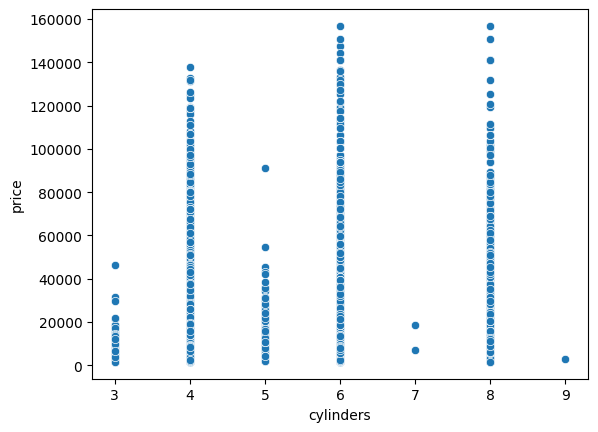

In [ ]:
plt.figure()
sns.scatterplot(data=Car_Prices_Data,x='cylinders',y='price')
plt.show()

In [ ]:
Car_Prices_Data[(Car_Prices_Data['cylinders']==9)]

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,wheel,color,airbags,no of years,engine with turbo,front and beside doors,back doors
2953,2800,-,vaz,2107,1999,sedan,no,petrol,1.6,10000,9.0,manual,4x4,left wheel,white,6,26,no,4,1


- it is the only one here and may bais the model

In [ ]:
Car_Prices_Data=Car_Prices_Data.drop([
    2953
    ],axis=0)

In [ ]:
Car_Prices_Data[(Car_Prices_Data['cylinders']==9)]

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,wheel,color,airbags,no of years,engine with turbo,front and beside doors,back doors


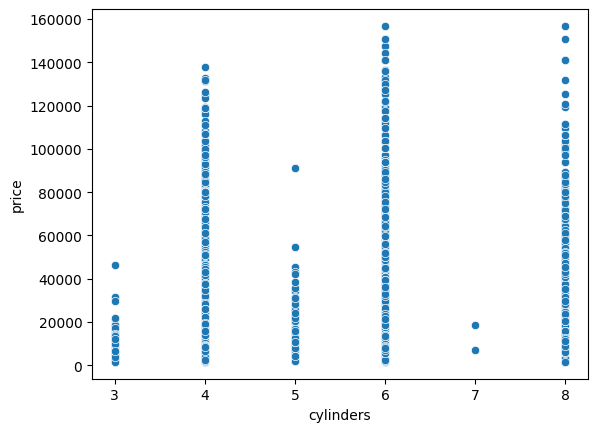

In [ ]:
plt.figure()
sns.scatterplot(data=Car_Prices_Data,x='cylinders',y='price')
plt.show()

###Change Data type

- I notice data type should be a category so I will change it to int to delete float point and then change it to category

In [ ]:
Car_Prices_Data['cylinders']=Car_Prices_Data['cylinders'].astype('int')

In [ ]:
Car_Prices_Data['cylinders']=Car_Prices_Data['cylinders'].astype('category')

In [ ]:
Car_Prices_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13810 entries, 0 to 19234
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   price                   13810 non-null  int64   
 1   levy                    13810 non-null  object  
 2   manufacturer            13810 non-null  category
 3   model                   13810 non-null  category
 4   production year         13810 non-null  category
 5   category                13810 non-null  category
 6   leather interior        13810 non-null  category
 7   fuel type               13810 non-null  category
 8   engine volume           13810 non-null  float64 
 9   mileage in km           13810 non-null  int64   
 10  cylinders               13810 non-null  category
 11  gear box type           13810 non-null  category
 12  drive wheels            13810 non-null  category
 13  wheel                   13810 non-null  category
 14  color                   138

<Axes: xlabel='cylinders', ylabel='count'>

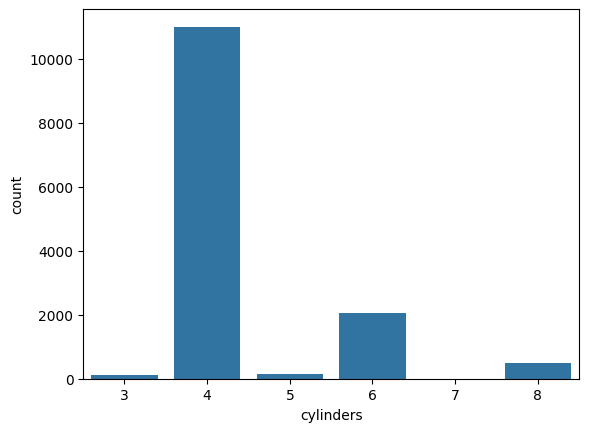

In [ ]:
plt.figure()
sns.countplot(data=Car_Prices_Data , x='cylinders')

In [ ]:
Car_Prices_Data.describe()

,price,engine volume,mileage in km,airbags,no of years,front and beside doors,back doors
count,13810.000000,13810.000000,13810.000000,13810.000000,13810.000000,13810.000000,13810.0
mean,20411.221723,2.190898,127406.821289,6.315930,14.549964,4.025054,1.0
std,17017.362011,0.766161,84264.152973,3.890944,5.900864,0.156296,0.0
min,1550.000000,0.100000,0.000000,0.000000,5.000000,4.000000,1.0
25%,9565.000000,1.600000,66000.000000,4.000000,11.000000,4.000000,1.0
50%,15994.000000,2.000000,119140.000000,4.000000,13.000000,4.000000,1.0
75%,24838.750000,2.500000,174463.750000,10.000000,17.000000,4.000000,1.0
max,156805.000000,6.400000,500000.000000,16.000000,82.000000,5.000000,1.0


# Feature Selection

In [ ]:
Car_Prices_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13810 entries, 0 to 19234
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   price                   13810 non-null  int64   
 1   levy                    13810 non-null  object  
 2   manufacturer            13810 non-null  category
 3   model                   13810 non-null  category
 4   production year         13810 non-null  category
 5   category                13810 non-null  category
 6   leather interior        13810 non-null  category
 7   fuel type               13810 non-null  category
 8   engine volume           13810 non-null  float64 
 9   mileage in km           13810 non-null  int64   
 10  cylinders               13810 non-null  category
 11  gear box type           13810 non-null  category
 12  drive wheels            13810 non-null  category
 13  wheel                   13810 non-null  category
 14  color                   138

- ensure data without duplicates after changes and analysis

In [ ]:
duplicates=Car_Prices_Data.duplicated()
Car_Prices_Data[duplicates]

,price,levy,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,wheel,color,airbags,no of years,engine with turbo,front and beside doors,back doors


In [ ]:
Car_Prices_Data.shape

(13810, 20)

-No duplicates

## drop Columns

- Drop levy and color column
  - levy column : doesnot has any discription and has a high inconsistancy in values which affect model results
  - color : not a high related column to price

In [ ]:
Car_Prices_Data=Car_Prices_Data.drop(columns=['color','levy'])

In [ ]:
Car_Prices_Data.info

<bound method DataFrame.info of        price   manufacturer    model production year     category  \
0      13328          lexus   rx 450            2010         jeep   
1      16621      chevrolet  equinox            2011         jeep   
2       8467          honda      fit            2006    hatchback   
3       3607           ford   escape            2011         jeep   
4      11726          honda      fit            2014    hatchback   
...      ...            ...      ...             ...          ...   
19225   8781           opel    combo            2007  goods wagon   
19226   7840         nissan  skyline            2003        sedan   
19232   8467  mercedes-benz  clk 200            1999        coupe   
19233  15681        hyundai   sonata            2011        sedan   
19234  26108        hyundai   tucson            2010         jeep   

      leather interior fuel type  engine volume  mileage in km cylinders  \
0                  yes    hybrid            3.5         186005         6   
1                   no    petrol            3.0         192000         6   
2                   no    petrol            1.3         200000         4   
3                  yes    hybrid            2.5         168966         4   
4                  yes    petrol            1.3          91901         4   
...                ...       ...            ...            ...       ...   
19225               no    diesel            1.7         236000         4   
19226              yes    petrol            3.0         220000         6   
19232              yes       cng            2.0         300000         4   
19233              yes    petrol            2.4         161600         4   
19234              yes    diesel            2.0         116365         4   

      gear box type drive wheels             wheel  airbags  no of years  \
0         automatic          4x4        left wheel       12           15   
1         tiptronic          4x4        left wheel        8           14   
2          variator        front  right-hand drive        2           19   
3         automatic          4x4        left wheel        0           14   
4         automatic        front        left wheel        4           11   
...             ...          ...               ...      ...          ...   
19225        manual        front        left wheel        4           18   
19226     tiptronic         rear  right-hand drive        0           22   
19232        manual         rear        left wheel        5           26   
19233     tiptronic        front        left wheel        8           14   
19234     automatic        front        left wheel        4           15   

      engine with turbo  front and beside doors  back doors  
0                    no                       4           1  
1                    no                       4           1  
2                    no                       4           1  
3                    no                       4           1  
4                    no                       4           1  
...                 ...                     ...         ...  
19225               yes                       4           1  
19226                no                       4           1  
19232               yes                       4           1  
19233                no                       4           1  
19234                no                       4           1  

[13810 rows x 18 columns]>

## correlation analysis

In [ ]:
Car_Prices_Data=Car_Prices_Data.reset_index(drop=True)

In [ ]:
Car_Prices_Data

,price,manufacturer,model,production year,category,leather interior,fuel type,engine volume,mileage in km,cylinders,gear box type,drive wheels,wheel,airbags,no of years,engine with turbo,front and beside doors,back doors
0,13328,lexus,rx 450,2010,jeep,yes,hybrid,3.5,186005,6,automatic,4x4,left wheel,12,15,no,4,1
1,16621,chevrolet,equinox,2011,jeep,no,petrol,3.0,192000,6,tiptronic,4x4,left wheel,8,14,no,4,1
2,8467,honda,fit,2006,hatchback,no,petrol,1.3,200000,4,variator,front,right-hand drive,2,19,no,4,1
3,3607,ford,escape,2011,jeep,yes,hybrid,2.5,168966,4,automatic,4x4,left wheel,0,14,no,4,1
4,11726,honda,fit,2014,hatchback,yes,petrol,1.3,91901,4,automatic,front,left wheel,4,11,no,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13805,8781,opel,combo,2007,goods wagon,no,diesel,1.7,236000,4,manual,front,left wheel,4,18,yes,4,1
13806,7840,nissan,skyline,2003,sedan,yes,petrol,3.0,220000,6,tiptronic,rear,right-hand drive,0,22,no,4,1
13807,8467,mercedes-benz,clk 200,1999,coupe,yes,cng,2.0,300000,4,manual,rear,left wheel,5,26,yes,4,1
13808,15681,hyundai,sonata,2011,sedan,yes,petrol,2.4,161600,4,tiptronic,front,left wheel,8,14,no,4,1


In [ ]:
Car_Data_Category=Car_Prices_Data.select_dtypes(include=['category'])

In [ ]:
Car_Data_int=Car_Prices_Data.select_dtypes(exclude=['category'])

### numerical analysis

In [ ]:
Car_Data_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13810 entries, 0 to 13809
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   13810 non-null  int64  
 1   engine volume           13810 non-null  float64
 2   mileage in km           13810 non-null  int64  
 3   airbags                 13810 non-null  int64  
 4   no of years             13810 non-null  int64  
 5   front and beside doors  13810 non-null  int64  
 6   back doors              13810 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 755.4 KB


In [ ]:
Car_Data_int.index

RangeIndex(start=0, stop=13810, step=1)

In [ ]:
corr=Car_Data_int.corr()
corr

,price,engine volume,mileage in km,airbags,no of years,front and beside doors,back doors
price,1.000000,0.240788,-0.228127,0.077419,-0.416259,-0.022701,NaN
engine volume,0.240788,1.000000,0.109693,0.254386,0.099346,0.023917,NaN
mileage in km,-0.228127,0.109693,1.000000,-0.067926,0.271200,0.089814,NaN
airbags,0.077419,0.254386,-0.067926,1.000000,-0.265903,-0.152339,NaN
no of years,-0.416259,0.099346,0.271200,-0.265903,1.000000,0.169657,NaN
front and beside doors,-0.022701,0.023917,0.089814,-0.152339,0.169657,1.000000,NaN
back doors,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

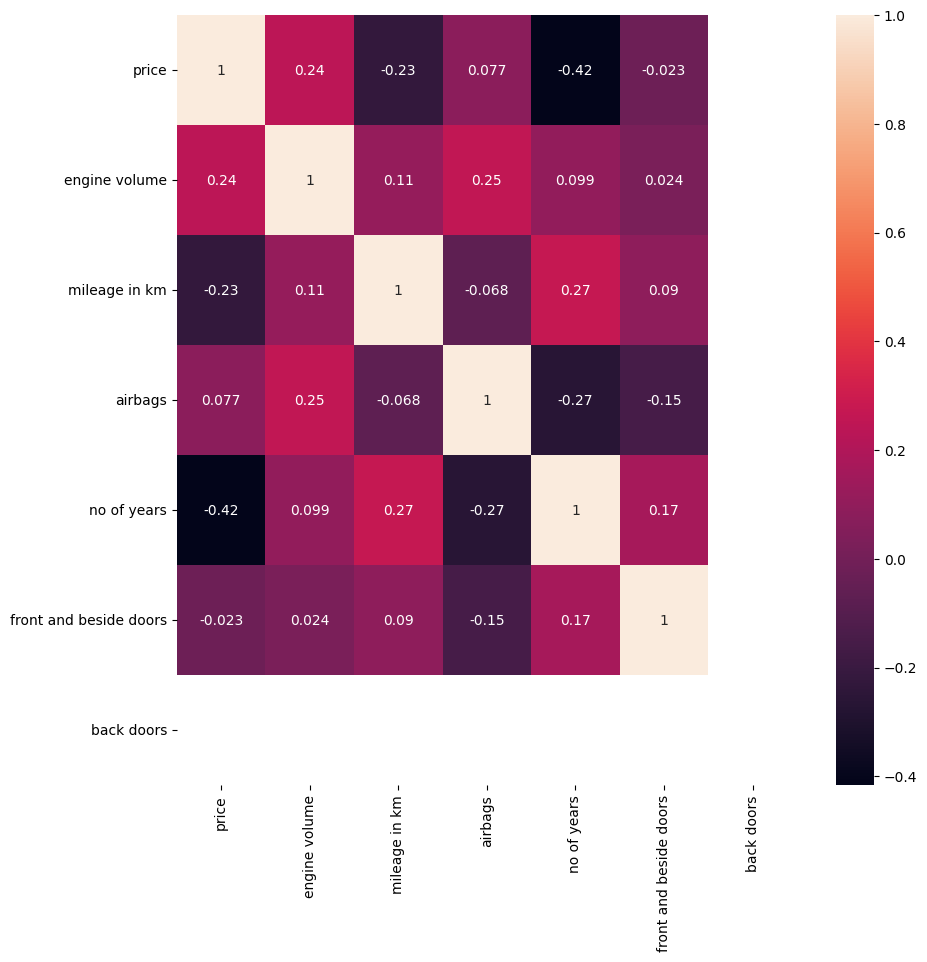

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

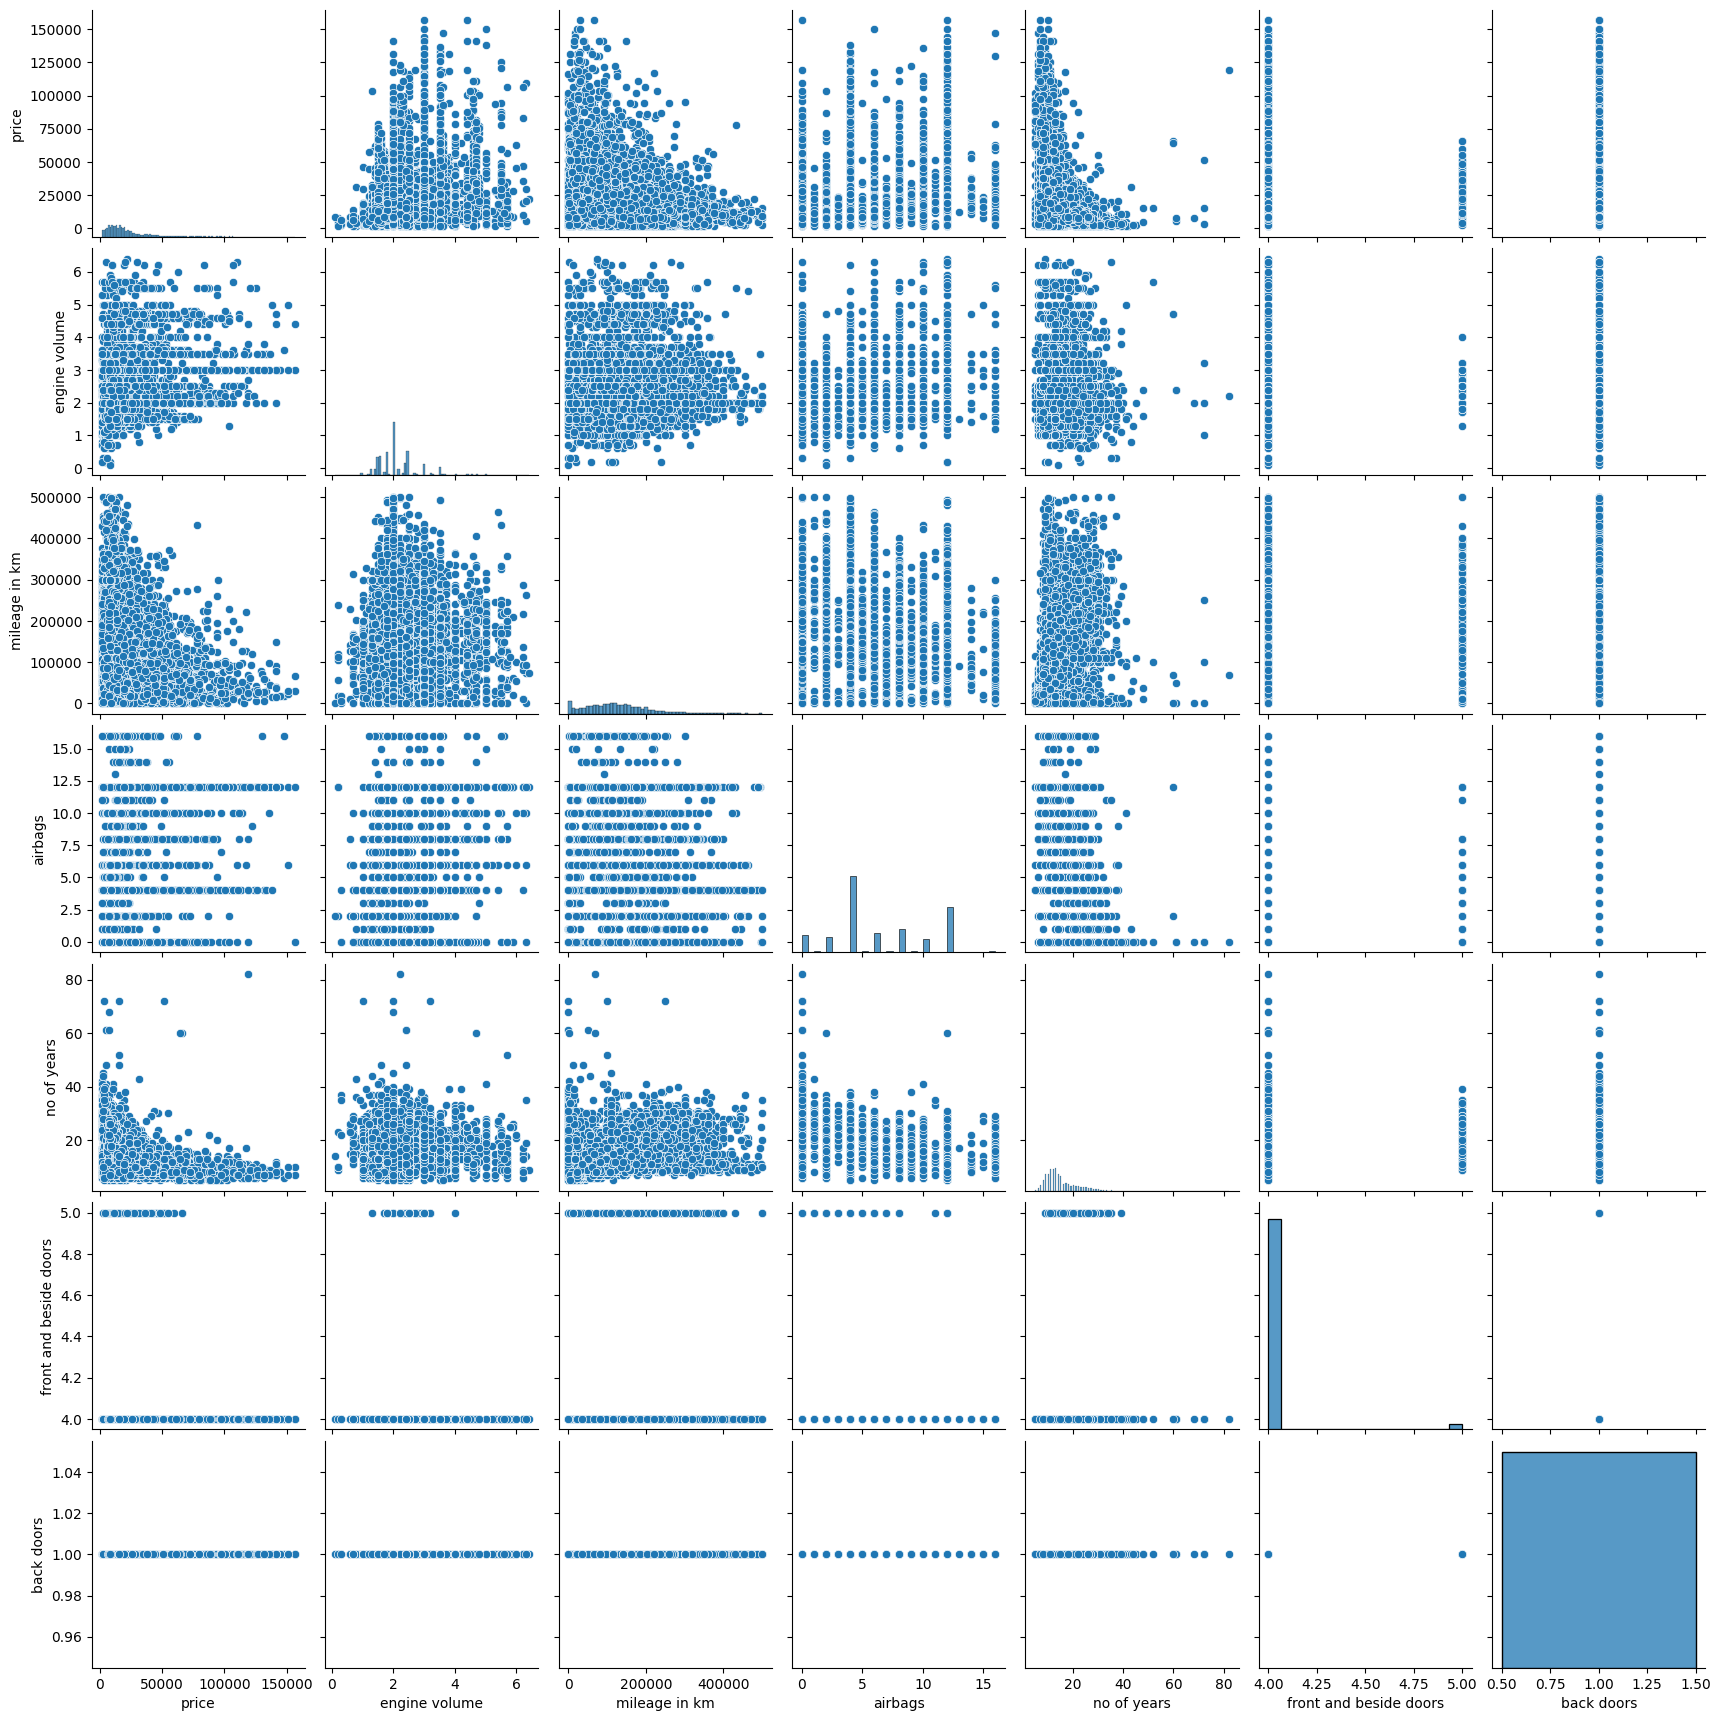

In [ ]:
sns.pairplot(data=Car_Prices_Data[['price','engine volume', 'mileage in km', 'cylinders',
       'airbags', 'no of years', 'front and beside doors', 'back doors',]])

- No multicolinearity between variables

- drop column that has a low effect to target

In [ ]:
Car_Data_int=Car_Data_int.drop(columns=['airbags','front and beside doors','back doors'])

In [ ]:
Car_Data_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13810 entries, 0 to 13809
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          13810 non-null  int64  
 1   engine volume  13810 non-null  float64
 2   mileage in km  13810 non-null  int64  
 3   no of years    13810 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 431.7 KB


In [ ]:
y=Car_Data_int.pop('price')

In [ ]:
Car_Data_int.head()

,engine volume,mileage in km,no of years
0,3.5,186005,15
1,3.0,192000,14
2,1.3,200000,19
3,2.5,168966,14
4,1.3,91901,11


In [ ]:
y.head()

,price
0,13328
1,16621
2,8467
3,3607
4,11726


array([[<Axes: title={'center': 'engine volume'}>,
        <Axes: title={'center': 'mileage in km'}>],
       [<Axes: title={'center': 'no of years'}>, <Axes: >]], dtype=object)

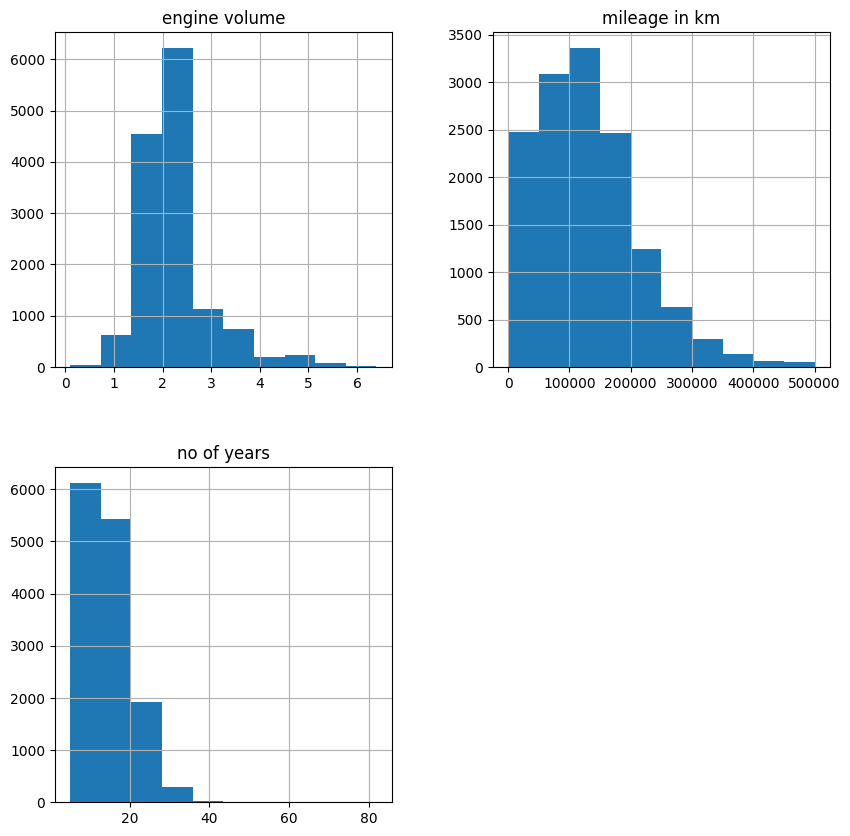

In [ ]:
Car_Data_int.hist(figsize=(10,10))

In [ ]:
Car_Data_int['mileage in km'].min()

0

In [ ]:
import numpy as np
Car_Data_int['no of years']=np.log(Car_Data_int['no of years'])

array([[<Axes: title={'center': 'engine volume'}>,
        <Axes: title={'center': 'mileage in km'}>],
       [<Axes: title={'center': 'no of years'}>, <Axes: >]], dtype=object)

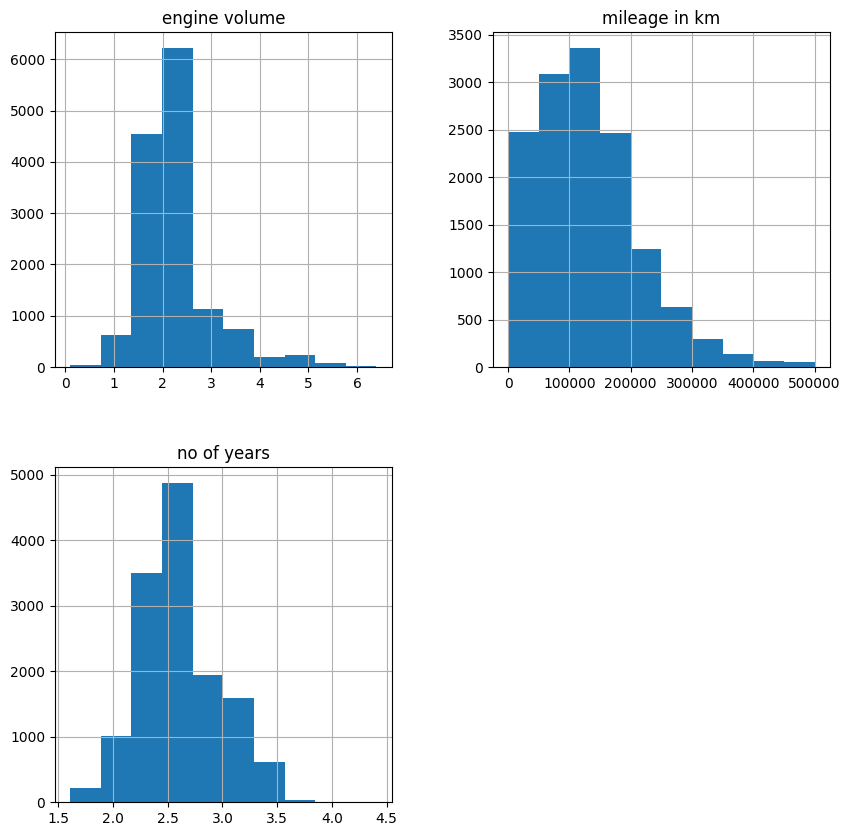

In [ ]:
Car_Data_int.hist(figsize=(10,10))

### Categorical analysis

In [ ]:
Car_Data_Category.describe()

,manufacturer,model,production year,category,leather interior,fuel type,cylinders,gear box type,drive wheels,wheel,engine with turbo
count,13810,13810,13810,13810,13810,13810,13810,13810,13810,13810,13810
unique,60,1437,48,11,2,7,6,4,3,2,2
top,hyundai,prius,2012,sedan,yes,petrol,4,automatic,front,left wheel,no
freq,2772,780,1478,6035,9039,7642,11000,8502,9774,12537,12004


In [ ]:
Car_Data_Category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13810 entries, 0 to 13809
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   manufacturer       13810 non-null  category
 1   model              13810 non-null  category
 2   production year    13810 non-null  category
 3   category           13810 non-null  category
 4   leather interior   13810 non-null  category
 5   fuel type          13810 non-null  category
 6   cylinders          13810 non-null  category
 7   gear box type      13810 non-null  category
 8   drive wheels       13810 non-null  category
 9   wheel              13810 non-null  category
 10  engine with turbo  13810 non-null  category
dtypes: category(11)
memory usage: 212.7 KB


In [ ]:
Car_Data_Category.columns

Index(['manufacturer', 'model', 'production year', 'category',
       'leather interior', 'fuel type', 'cylinders', 'gear box type',
       'drive wheels', 'wheel', 'engine with turbo'],
      dtype='object')

In [ ]:
Car_Data_Category.index

RangeIndex(start=0, stop=13810, step=1)

In [ ]:
Car_Data_Category.shape

(13810, 11)

- encode columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for col in Car_Data_Category:
  Car_Data_Category[col]=encoder.fit_transform(Car_Data_Category[col])

In [ ]:
Car_Data_Category.head()

,manufacturer,model,production year,category,leather interior,fuel type,cylinders,gear box type,drive wheels,wheel,engine with turbo
0,29,1145,37,4,1,2,3,0,0,0,0
1,7,595,38,4,0,5,3,2,0,0,0
2,19,627,33,3,0,5,1,3,1,1,0
3,15,601,38,4,1,2,1,0,0,0,0
4,19,627,41,3,1,5,1,0,1,0,0


chi2 square feature selection

In [ ]:
from sklearn.feature_selection import chi2

In [ ]:
for col in Car_Data_Category:
  chi_value,p_value=chi2(Car_Data_Category[[col]],y)
  print(f'column: {col} , chi_value: {chi_value} , p_value: {p_value}')

column: manufacturer , chi_value: [23502.72405535] , p_value: [0.]
column: model , chi_value: [519719.1936382] , p_value: [0.]
column: production year , chi_value: [5726.36506691] , p_value: [0.]
column: category , chi_value: [3434.97272847] , p_value: [8.58263434e-59]
column: leather interior , chi_value: [1393.28579983] , p_value: [1.]
column: fuel type , chi_value: [3389.09968557] , p_value: [3.3133389e-55]
column: cylinders , chi_value: [2032.39855127] , p_value: [0.99214453]
column: gear box type , chi_value: [5006.25958092] , p_value: [2.6877442e-221]
column: drive wheels , chi_value: [423.64565687] , p_value: [1.]
column: wheel , chi_value: [2693.84340836] , p_value: [5.3429625e-13]
column: engine with turbo , chi_value: [2322.8895627] , p_value: [0.023092]


In [ ]:
Car_Data_Category=Car_Data_Category.drop(columns=['leather interior','drive wheels'])

- cylinders also approximately 1 so I will delete it

In [ ]:
Car_Data_Category=Car_Data_Category.drop(columns=['cylinders'])

In [ ]:
Car_Data_Category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13810 entries, 0 to 13809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   manufacturer       13810 non-null  int64
 1   model              13810 non-null  int64
 2   production year    13810 non-null  int64
 3   category           13810 non-null  int64
 4   fuel type          13810 non-null  int64
 5   gear box type      13810 non-null  int64
 6   wheel              13810 non-null  int64
 7   engine with turbo  13810 non-null  int64
dtypes: int64(8)
memory usage: 863.3 KB


# train test split and model

In [ ]:
x=pd.concat([Car_Data_Category,Car_Data_int],axis=1)

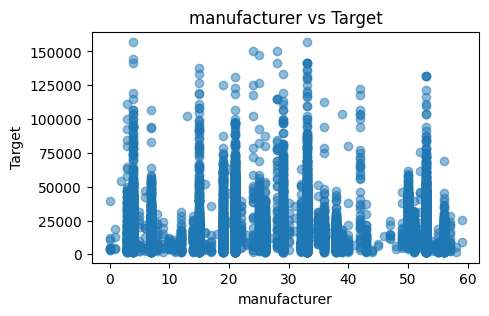

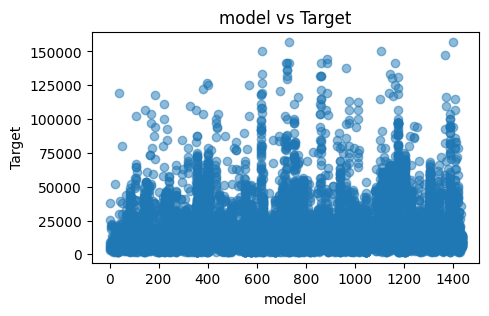

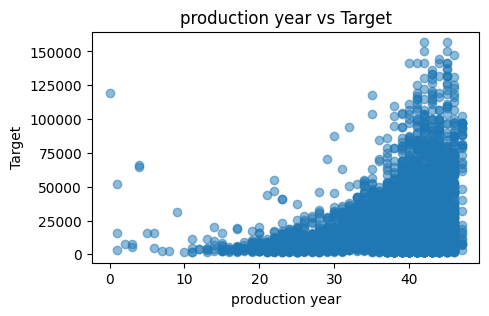

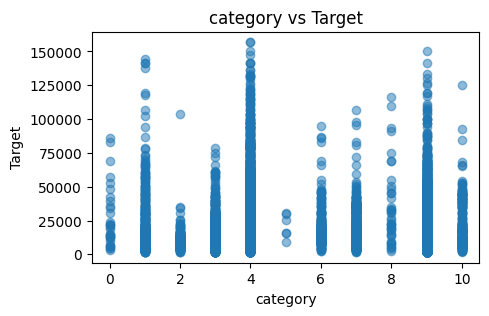

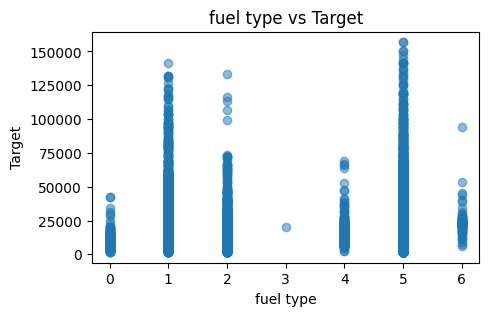

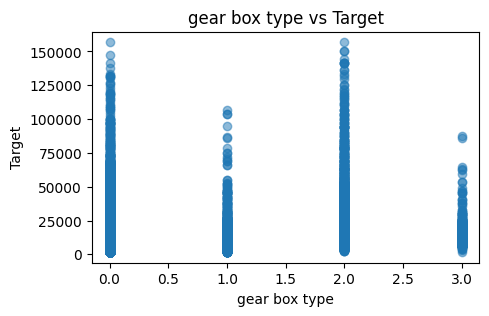

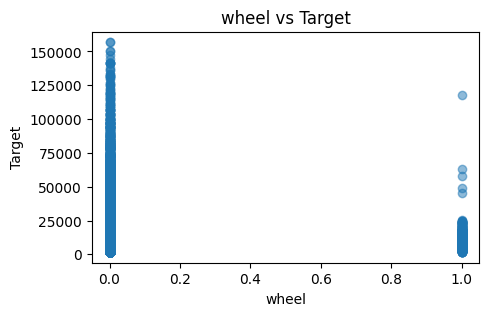

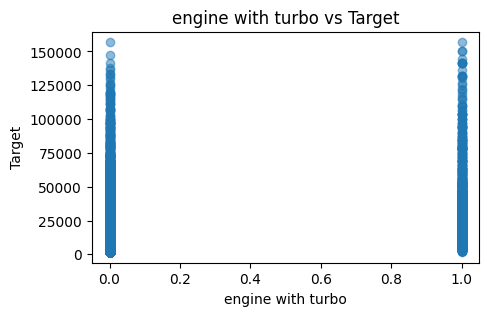

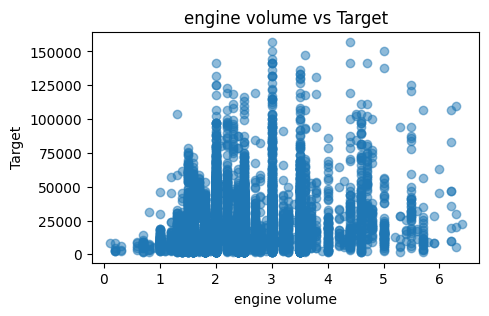

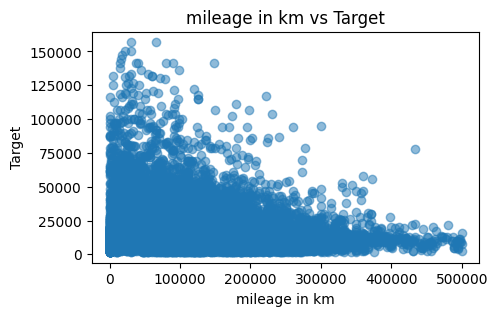

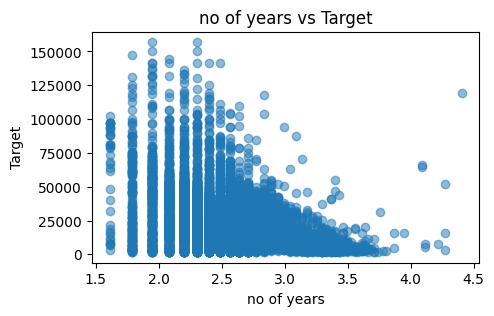

In [ ]:
import matplotlib.pyplot as plt

# Suppose X is a DataFrame with features, y is the target
for col in x.columns:
    plt.figure(figsize=(5,3))
    plt.scatter(x[col], y, alpha=0.5)
    plt.title(f"{col} vs Target")
    plt.xlabel(col)
    plt.ylabel("Target")
    plt.show()


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13810 entries, 0 to 13809
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer       13810 non-null  int64  
 1   model              13810 non-null  int64  
 2   production year    13810 non-null  int64  
 3   category           13810 non-null  int64  
 4   fuel type          13810 non-null  int64  
 5   gear box type      13810 non-null  int64  
 6   wheel              13810 non-null  int64  
 7   engine with turbo  13810 non-null  int64  
 8   engine volume      13810 non-null  float64
 9   mileage in km      13810 non-null  int64  
 10  no of years        13810 non-null  float64
dtypes: float64(2), int64(9)
memory usage: 1.2 MB


In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x = scaler.fit_transform(x)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
x=min_max_scaler.fit_transform(x)

In [ ]:
x

array([[0.49152542, 0.79735376, 0.78723404, ..., 0.53968254, 0.37201   ,
        0.39274287],
       [0.11864407, 0.4143454 , 0.80851064, ..., 0.46031746, 0.384     ,
        0.36807861],
       [0.3220339 , 0.43662953, 0.70212766, ..., 0.19047619, 0.4       ,
        0.47724948],
       ...,
       [0.55932203, 0.28830084, 0.55319149, ..., 0.3015873 , 0.6       ,
        0.58937891],
       [0.3559322 , 0.83983287, 0.80851064, ..., 0.36507937, 0.3232    ,
        0.36807861],
       [0.3559322 , 0.90877437, 0.78723404, ..., 0.3015873 , 0.23273   ,
        0.39274287]])

In [ ]:
# y -> defined in feature selection
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test,y_predict)

In [ ]:
MSE

167203085.7672874

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2 = r2_score(y_test, y_predict)
r2

0.4179930598723286

In [ ]:
print(y_test.min(),y_test.max())

1568 156805


- polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)

In [ ]:
MSE=mean_squared_error(y_test,y_predict)

In [ ]:
MSE

135363289.19097894

In [ ]:
r2 = r2_score(y_test, y_predict)
r2

0.5288222499834259